In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
restInspectSanFran = pd.read_csv('../data/sanfran_inspections.csv')
restInspectSanFran.drop(["business_address", 
                         "business_phone_number", 
                         "business_latitude", 
                         "business_longitude", 
                         "business_location", 
                         "inspection_id", 
                         "violation_id", 
                         "risk_category", 
                         "Neighborhoods", 
                         "SF Find Neighborhoods", 
                         "Current Police Districts", 
                         "Current Supervisor Districts", 
                         "Analysis Neighborhoods"], axis = 1, inplace = True)
restInspectSanFran

,business_id,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_type,violation_description
0,835,Kam Po Kitchen,San Francisco,CA,94133,09/17/2018 12:00:00 AM,88.0,Routine - Unscheduled,Improper food storage
1,905,Working Girls' Cafe',San Francisco,CA,94108,04/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,High risk vermin infestation
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,08/03/2017 12:00:00 AM,77.0,Routine - Unscheduled,Moderate risk food holding temperature
3,1345,Cordon Bleu,San Francisco,CA,94109,09/28/2017 12:00:00 AM,81.0,Routine - Unscheduled,Improper cooling methods
4,1352,LA TORTILLA,San Francisco,CA,94114,06/20/2018 12:00:00 AM,74.0,Routine - Unscheduled,Non service animal
...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,San Francisco,CA,94105,04/08/2019 12:00:00 AM,85.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...
53969,65396,Carmelina's Cafe,San Francisco,CA,94103,01/27/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN
53970,64835,Jane,San Francisco,CA,94115,12/05/2016 12:00:00 AM,NaN,Reinspection/Followup,NaN
53971,1000,HEUNG YUEN RESTAURANT,San Francisco,CA,94110,06/08/2018 12:00:00 AM,NaN,Reinspection/Followup,NaN


In [3]:
restInspectSanFran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_id            53973 non-null  int64  
 1   business_name          53973 non-null  object 
 2   business_city          53973 non-null  object 
 3   business_state         53973 non-null  object 
 4   business_postal_code   52787 non-null  object 
 5   inspection_date        53973 non-null  object 
 6   inspection_score       39541 non-null  float64
 7   inspection_type        53973 non-null  object 
 8   violation_description  40253 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.7+ MB


In [4]:
restInspectSanFran.violation_description.unique()

array(['Improper food storage', 'High risk vermin infestation',
       'Moderate risk food holding temperature',
       'Improper cooling methods', 'Non service animal',
       'Low risk vermin infestation', 'Other low risk violation',
       'Food in poor condition', 'Improper thawing methods',
       'Unclean nonfood contact surfaces', 'Improper reheating of food',
       'Improper or defective plumbing',
       'No thermometers or uncalibrated thermometers',
       'Unapproved or unmaintained equipment or utensils',
       'Wiping cloths not clean or properly stored or inadequate sanitizer',
       'Improper storage of equipment utensils or linens',
       'High risk food holding temperature',
       'Insufficient hot water or running water',
       'Permit license or inspection report not posted',
       'Inadequate and inaccessible handwashing facilities',
       'Unclean hands or improper use of gloves',
       'Inadequate ventilation or lighting',
       'No plan review or Build

In [5]:
restInspectSanFran.inspection_type.unique()

array(['Routine - Unscheduled', 'Complaint', 'Structural Inspection',
       'Reinspection/Followup', 'New Ownership', 'New Construction',
       'Non-inspection site visit', 'New Ownership - Followup',
       'Foodborne Illness Investigation', 'Routine - Scheduled',
       'Complaint Reinspection/Followup', 'Special Event',
       'Administrative or Document Review', 'Multi-agency Investigation',
       'Community Health Assessment'], dtype=object)

In [6]:
restInspectSanFran.business_postal_code.nunique()

62

In [7]:
restInspectSanFran['inspection_month'] = restInspectSanFran['inspection_date'].str[0:2]
restInspectSanFran['inspection_day'] = restInspectSanFran['inspection_date'].str[3:5]
restInspectSanFran['inspection_year'] = restInspectSanFran['inspection_date'].str[6:10]
restInspectSanFran.head()

,business_id,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,09/17/2018 12:00:00 AM,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,04/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,08/03/2017 12:00:00 AM,77.0,Routine - Unscheduled,Moderate risk food holding temperature,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,09/28/2017 12:00:00 AM,81.0,Routine - Unscheduled,Improper cooling methods,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,06/20/2018 12:00:00 AM,74.0,Routine - Unscheduled,Non service animal,06,20,2018


In [8]:
#restInspectSanFran['inspection_month'].replace('01', 'Jan', inplace = True)
#restInspectSanFran['inspection_month'].replace('02', 'Feb', inplace = True)
#restInspectSanFran['inspection_month'].replace('03', 'Mar', inplace = True)
#restInspectSanFran['inspection_month'].replace('04', 'Apr', inplace = True)
#restInspectSanFran['inspection_month'].replace('05', 'May', inplace = True)
#restInspectSanFran['inspection_month'].replace('06', 'Jun', inplace = True)
#restInspectSanFran['inspection_month'].replace('07', 'Jul', inplace = True)
#restInspectSanFran['inspection_month'].replace('08', 'Aug', inplace = True)
#restInspectSanFran['inspection_month'].replace('09', 'Sep', inplace = True)
#restInspectSanFran['inspection_month'].replace('10', 'Oct', inplace = True)
#restInspectSanFran['inspection_month'].replace('11', 'Nov', inplace = True)
#restInspectSanFran['inspection_month'].replace('12', 'Dec', inplace = True)

In [9]:
restInspectSanFran.drop(["inspection_date"], axis = 1, inplace = True)
restInspectSanFran

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Moderate risk food holding temperature,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Improper cooling methods,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
...,...,...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,San Francisco,CA,94105,85.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,04,08,2019
53969,65396,Carmelina's Cafe,San Francisco,CA,94103,NaN,Reinspection/Followup,NaN,01,27,2017
53970,64835,Jane,San Francisco,CA,94115,NaN,Reinspection/Followup,NaN,12,05,2016
53971,1000,HEUNG YUEN RESTAURANT,San Francisco,CA,94110,NaN,Reinspection/Followup,NaN,06,08,2018


In [10]:
restInspectSanFran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_id            53973 non-null  int64  
 1   business_name          53973 non-null  object 
 2   business_city          53973 non-null  object 
 3   business_state         53973 non-null  object 
 4   business_postal_code   52787 non-null  object 
 5   inspection_score       39541 non-null  float64
 6   inspection_type        53973 non-null  object 
 7   violation_description  40253 non-null  object 
 8   inspection_month       53973 non-null  object 
 9   inspection_day         53973 non-null  object 
 10  inspection_year        53973 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.5+ MB


In [11]:
restInspectSanFran.inspection_year.unique()

array(['2018', '2019', '2017', '2016'], dtype=object)

In [12]:
#Replacement: Handwashing and Toilet Facilities - 1
oldString1 = ['Inadequate and inaccessible handwashing facilities']
newString1 = 'Handwashing and Toilet Facilities'
restInspectSanFran['violation_description'].replace(oldString1, newString1, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Moderate risk food holding temperature,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Improper cooling methods,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Low risk vermin infestation,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Improper cooling methods,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [13]:
#Replacement: Employee Health - 2
oldString2 = ['Unclean hands or improper use of gloves',
              'Discharge from employee nose mouth or eye']
newString2 = 'Employee Health'
restInspectSanFran['violation_description'].replace(oldString2, newString2, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Moderate risk food holding temperature,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Improper cooling methods,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Low risk vermin infestation,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Improper cooling methods,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [14]:
#Replacement: Temperature Control Procedures and checking the dataframe - 3
oldString3 = ['Moderate risk food holding temperature',
              'Improper cooling methods', 
              'Improper thawing methods',
              'Improper reheating of food',
              'High risk food holding temperature',
              'Improper cooking time or temperatures']
newString3 = 'Temperature Control Procedures'
restInspectSanFran['violation_description'].replace(oldString3, newString3, inplace=True)
restInspectSanFran.head(40)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Low risk vermin infestation,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [15]:
#Replacement: Approved Source and checking the dataframe - 4
oldString4 = ['Unapproved food source']
newString4 = 'Approved Source'
restInspectSanFran['violation_description'].replace(oldString4, newString4, inplace=True)
restInspectSanFran

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
...,...,...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,San Francisco,CA,94105,85.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,04,08,2019
53969,65396,Carmelina's Cafe,San Francisco,CA,94103,NaN,Reinspection/Followup,NaN,01,27,2017
53970,64835,Jane,San Francisco,CA,94115,NaN,Reinspection/Followup,NaN,12,05,2016
53971,1000,HEUNG YUEN RESTAURANT,San Francisco,CA,94110,NaN,Reinspection/Followup,NaN,06,08,2018


In [16]:
#Replacement: Water, Sewage, Plumbing Systems - 5
oldString5 = ['Improper or defective plumbing',
              'Insufficient hot water or running water',
              'Inadequate sewage or wastewater disposal',
              'No hot water or running water', 
              'Sewage or wastewater contamination']
newString5 = 'Water, Sewage, Plumbing Systems'
restInspectSanFran['violation_description'].replace(oldString5, newString5, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Low risk vermin infestation,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [17]:
#Replacement: Cleaning of Equipment and Utensils - 6
oldString6 = ['Unclean nonfood contact surfaces',
              'Unapproved or unmaintained equipment or utensils',
              'Wiping cloths not clean or properly stored or inadequate sanitizer',
              'Inadequately cleaned or sanitized food contact surfaces',
              'Unclean or unsanitary food contact surfaces',
              'Inadequate warewashing facilities or equipment'
]
newString6 = 'Cleaning of Equipment and Utensils'
restInspectSanFran['violation_description'].replace(oldString6, newString6, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,High risk vermin infestation,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Non service animal,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Low risk vermin infestation,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [18]:
#Replacement: Pest Control - 7
oldString7 = ['High risk vermin infestation',
              'Non service animal',
              'Low risk vermin infestation', 
              'Moderate risk vermin infestation']
newString7 = 'Pest Control'
restInspectSanFran['violation_description'].replace(oldString7, newString7, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [19]:
#Replacement: Wholesome, Free of Spoilage - 8
oldString8 = ['Food in poor condition', 
              'Contaminated or adulterated food']
newString8 = 'Wholesome, Free of Spoilage'
restInspectSanFran['violation_description'].replace(oldString8, newString8, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [20]:
#Replacement: Consumer Advisory for Service of Raw/Undercooked Animal Foods - 9
oldString9 = 'Consumer advisory not provided for raw or undercooked foods'
newString9 = 'Consumer Advisory for Service of Raw/Undercooked Animal Foods'
restInspectSanFran['violation_description'].replace(oldString9, newString9, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [21]:
#Replacement: Utensils, Single-service Articles - 10
oldString10 = 'Improper storage of equipment utensils or linens'
newString10 = 'Utensils, Single-service Articles'
restInspectSanFran['violation_description'].replace(oldString10, newString10, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [22]:
#Replacement: Physical Facilities - 11
oldString11 = ['Inadequate ventilation or lighting',
               'Unclean or degraded floors walls or ceilings',
               'Inadequate dressing rooms or improper storage of personal items',
               'Unclean unmaintained or improperly constructed toilet facilities',
               'Inadequate or unsanitary refuse containers or area or no garbage service',
               'Unapproved living quarters in food facility',
               'Mobile food facility stored in unapproved location',
               'Mobile food facility with unapproved operating conditions',
               'Mobile food facility not operating with an approved commissary',
               'No restroom facility within 200 feet of mobile food facility']
newString11 = 'Physical Facilities'
restInspectSanFran['violation_description'].replace(oldString11, newString11, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [23]:
#Replacement: Temperature Control Equipment - 12
oldString12 = ['No thermometers or uncalibrated thermometers']
newString12 = 'Temperature Control Equipment'
restInspectSanFran['violation_description'].replace(oldString12, newString12, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,Improper food storage,09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,Improper food storage,11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,Improper food storage,07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,Improper food storage,04,25,2017


In [24]:
#Replacement: Food Labeling, Food Protection - 13
oldString13 = ['Improper food storage', 
               'Foods not protected from contamination',
               'Improper food labeling or menu misrepresentation']
newString13 = 'Food Labeling, Food Protection'
restInspectSanFran['violation_description'].replace(oldString13, newString13, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [25]:
#Replacement: Date Marking - 14
oldString14 = ['Inadequate procedures or records for time as a public health control',
               'Unauthorized or unsafe use of time as a public health control measure']
newString14 = 'Date Marking'
restInspectSanFran['violation_description'].replace(oldString14, newString14, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [26]:
#Replacement: Hygenic Practices - 15
oldString15 = ['Employee eating or smoking', 'Unsanitary employee garments hair or nails']
newString15 = 'Hygenic Practices'
restInspectSanFran['violation_description'].replace(oldString15, newString15, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [27]:
#Replacement: Poisonous or Toxic Items - 16
oldString16 = ['Improper storage use or identification of toxic substances']
newString16 = 'Poisonous or Toxic Items'
restInspectSanFran['violation_description'].replace(oldString16, newString16, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [28]:
#Replacement: Cross-contamination - 17
oldString17 = ['Reservice of previously served foods', 'Improperly washed fruits and vegetables']
newString17 = 'Cross-contamination'
restInspectSanFran['violation_description'].replace(oldString17, newString17, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [29]:
#Replacement: Demonstration of Knowledge - 18
oldString18 = ['Food safety certificate or food handler card not available',
               'Inadequate food safety knowledge or lack of certified food safety manager']
newString18 = 'Demonstration of Knowledge'
restInspectSanFran['violation_description'].replace(oldString18, newString18, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [30]:
#Replacement: Hazard Analysis Critical Control Point (HACCP) Plan - 19
oldString19 = ['Noncompliance with HAACP plan or variance',
               'Noncompliance with shell fish tags or display',
               'Inadequate HACCP plan record keeping', 
               'Noncompliance with Gulf Coast oyster regulation']
newString19 = 'HACCP Plan'
restInspectSanFran['violation_description'].replace(oldString19, newString19, inplace=True)
restInspectSanFran.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Routine - Unscheduled,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [31]:
dropString = ['Other low risk violation',
              'Permit license or inspection report not posted',
              'No plan review or Building Permit',
              'Unpermitted food facility',
              'Other moderate risk violation',
              'No person in charge of food facility',
              'Other high risk violation',
              'Worker safety hazards',
              'Improperly displayed mobile food permit or signage',
              'Unapproved  living quarters in food facility']
restInspectSanFran_df = restInspectSanFran[restInspectSanFran.violation_description.isin(dropString) == False]
restInspectSanFran_df

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Routine - Unscheduled,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Routine - Unscheduled,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Routine - Unscheduled,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Routine - Unscheduled,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Routine - Unscheduled,Pest Control,06,20,2018
...,...,...,...,...,...,...,...,...,...,...,...
53968,96202,Soma Eats 2,San Francisco,CA,94105,85.0,Routine - Unscheduled,Cleaning of Equipment and Utensils,04,08,2019
53969,65396,Carmelina's Cafe,San Francisco,CA,94103,NaN,Reinspection/Followup,NaN,01,27,2017
53970,64835,Jane,San Francisco,CA,94115,NaN,Reinspection/Followup,NaN,12,05,2016
53971,1000,HEUNG YUEN RESTAURANT,San Francisco,CA,94110,NaN,Reinspection/Followup,NaN,06,08,2018


In [32]:
restInspectSanFran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52643 entries, 0 to 53972
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_id            52643 non-null  int64  
 1   business_name          52643 non-null  object 
 2   business_city          52643 non-null  object 
 3   business_state         52643 non-null  object 
 4   business_postal_code   51524 non-null  object 
 5   inspection_score       38295 non-null  float64
 6   inspection_type        52643 non-null  object 
 7   violation_description  38923 non-null  object 
 8   inspection_month       52643 non-null  object 
 9   inspection_day         52643 non-null  object 
 10  inspection_year        52643 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.8+ MB


In [33]:
restInspectSanFran_df.violation_description.unique()

array(['Food Labeling, Food Protection', 'Pest Control',
       'Temperature Control Procedures', 'Wholesome, Free of Spoilage',
       'Cleaning of Equipment and Utensils',
       'Water, Sewage, Plumbing Systems', 'Temperature Control Equipment',
       'Utensils, Single-service Articles',
       'Handwashing and Toilet Facilities', 'Employee Health',
       'Physical Facilities', 'Demonstration of Knowledge',
       'Hygenic Practices', 'HACCP Plan', nan, 'Date Marking',
       'Poisonous or Toxic Items', 'Approved Source',
       'Cross-contamination',
       'Consumer Advisory for Service of Raw/Undercooked Animal Foods'],
      dtype=object)

In [34]:
restInspectSanFran_df['inspection_type'].unique()

array(['Routine - Unscheduled', 'Complaint', 'Structural Inspection',
       'Reinspection/Followup', 'New Ownership', 'New Construction',
       'Non-inspection site visit', 'New Ownership - Followup',
       'Foodborne Illness Investigation', 'Routine - Scheduled',
       'Complaint Reinspection/Followup', 'Special Event',
       'Administrative or Document Review', 'Multi-agency Investigation',
       'Community Health Assessment'], dtype=object)

In [35]:
#Inspection Type Replacements
restInspectSanFran_df['inspection_type'].replace('Routine - Unscheduled', 'Regular', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Routine - Scheduled', 'Regular', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Reinspection/Followup', 'Reinspection', inplace=True)
restInspectSanFran_df['inspection_type'].replace('New Ownership', 'Change of Ownership', inplace=True)
restInspectSanFran_df['inspection_type'].replace('New Construction', 'Opening', inplace=True)
restInspectSanFran_df['inspection_type'].replace('New Ownership - Followup', 'Follow Up', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Structural Inspection', 'Other', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Non-inspection site visit', 'Enforcement', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Special Event', 'Other', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Multi-agency Investigation', 'Enforcement', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Community Health Assessment', 'Other', inplace=True)
restInspectSanFran_df['inspection_type'].replace('Complaint Reinspection/Followup', 'Complaint Reinspection/Follow up', inplace=True)
restInspectSanFran_df.head(60)

C:\Users\jrtho\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Regular,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Regular,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Regular,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Regular,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Regular,Pest Control,06,20,2018
5,1652,STARBUCKS,San Francisco,CA,94105,96.0,Regular,Pest Control,06,11,2019
6,1922,All stars Donuts,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",11,28,2016
7,3019,Tad's,San Francisco,CA,94102,88.0,Regular,"Food Labeling, Food Protection",07,02,2019
8,3286,Super Burrito,San Francisco,CA,94109,81.0,Regular,Temperature Control Procedures,02,14,2019
9,4654,House of Bagels,San Francisco,CA,94118,NaN,Complaint,"Food Labeling, Food Protection",04,25,2017


In [36]:
restInspectSanFran_df['inspection_type'].unique()

array(['Regular', 'Complaint', 'Other', 'Reinspection',
       'Change of Ownership', 'Opening', 'Enforcement', 'Follow Up',
       'Foodborne Illness Investigation',
       'Complaint Reinspection/Follow up',
       'Administrative or Document Review'], dtype=object)

In [37]:
restInspectSanFran_df = restInspectSanFran_df.drop_duplicates()

In [38]:
restInspectSanFran_df = restInspectSanFran_df.dropna()

In [39]:
restInspectSanFran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31636 entries, 0 to 53968
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_id            31636 non-null  int64  
 1   business_name          31636 non-null  object 
 2   business_city          31636 non-null  object 
 3   business_state         31636 non-null  object 
 4   business_postal_code   31636 non-null  object 
 5   inspection_score       31636 non-null  float64
 6   inspection_type        31636 non-null  object 
 7   violation_description  31636 non-null  object 
 8   inspection_month       31636 non-null  object 
 9   inspection_day         31636 non-null  object 
 10  inspection_year        31636 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.9+ MB


In [40]:
#Number of restaurants
restInspectSanFran_df.business_id.nunique()

5133

In [41]:
restInspectSanFran_df.rename(columns = {'business_postal_code': 'postal_code', 'business_state':'state', 'business_city' : 'city'}, inplace=True)
restInspectSanFran_df

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Regular,"Food Labeling, Food Protection",09,17,2018
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Regular,Pest Control,04,15,2019
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Regular,Temperature Control Procedures,08,03,2017
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Regular,Temperature Control Procedures,09,28,2017
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Regular,Pest Control,06,20,2018
...,...,...,...,...,...,...,...,...,...,...,...
53939,95754,Fools Errand,San Francisco,CA,94117,84.0,Regular,Pest Control,03,27,2019
53943,100219,NAYA CAFE,San Francisco,CA,94121,91.0,Regular,Temperature Control Procedures,06,18,2019
53957,96532,THE CLIFT ROYAL SONESTA HOTEL,San Francisco,CA,94102,92.0,Regular,Cleaning of Equipment and Utensils,04,11,2019
53959,97503,Moscone South Main Kitchen,San Francisco,CA,94103,92.0,Regular,Handwashing and Toilet Facilities,06,10,2019


In [42]:
zipCodes = pd.read_csv('../data/uszips_cleaned.csv')
zipCodes['zip'] = zipCodes['zip'].astype(str)
zipCodes['zip'].dtypes

dtype('O')

In [43]:
zipCodes.rename(columns = {'zip': 'postal_code', 'state_id':'state'}, inplace=True)
zipCodes

,postal_code,city,state,population,density,county_name
0,601,Adjuntas,PR,16773,100,Adjuntas
1,602,Aguada,PR,37083,472,Aguada
2,603,Aguadilla,PR,45652,513,Aguadilla
3,606,Maricao,PR,6231,54,Maricao
4,610,Anasco,PR,26502,275,Añasco
...,...,...,...,...,...,...
33783,99923,Hyder,AK,12,0,Prince of Wales-Hyder
33784,99925,Klawock,AK,990,7,Prince of Wales-Hyder
33785,99926,Metlakatla,AK,1582,4,Prince of Wales-Hyder
33786,99927,Point Baker,AK,0,0,Prince of Wales-Hyder


In [44]:
sanFranInspectsAndZips = pd.merge(restInspectSanFran_df, zipCodes, how='left', on=['postal_code', 'state'])
sanFranInspectsAndZips

,business_id,business_name,city_x,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_y,population,density,county_name
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Regular,"Food Labeling, Food Protection",09,17,2018,San Francisco,26930.0,15812.0,San Francisco
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Regular,Pest Control,04,15,2019,San Francisco,13535.0,20257.0,San Francisco
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Regular,Temperature Control Procedures,08,03,2017,San Francisco,41241.0,7940.0,San Francisco
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Regular,Temperature Control Procedures,09,28,2017,San Francisco,55797.0,19972.0,San Francisco
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Regular,Pest Control,06,20,2018,San Francisco,35077.0,9781.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,San Francisco,CA,94117,84.0,Regular,Pest Control,03,27,2019,San Francisco,43526.0,13185.0,San Francisco
31632,100219,NAYA CAFE,San Francisco,CA,94121,91.0,Regular,Temperature Control Procedures,06,18,2019,San Francisco,43843.0,6678.0,San Francisco
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,San Francisco,CA,94102,92.0,Regular,Cleaning of Equipment and Utensils,04,11,2019,San Francisco,33264.0,19415.0,San Francisco
31634,97503,Moscone South Main Kitchen,San Francisco,CA,94103,92.0,Regular,Handwashing and Toilet Facilities,06,10,2019,San Francisco,31585.0,8876.0,San Francisco


In [45]:
sanFranInspectsAndZips.inspection_type.unique()

array(['Regular'], dtype=object)

In [46]:
incorrectPostalCodes = ['CA', 'Ca']
sanFranInspectsAndZips = sanFranInspectsAndZips[sanFranInspectsAndZips.postal_code.isin(incorrectPostalCodes) == False]
sanFranInspectsAndZips.drop(['city_y', 'county_name'], axis = 1, inplace = True)
sanFranInspectsAndZips.rename(columns = {'city_x' : 'city', 'population': 'city_population'}, inplace = True)
sanFranInspectsAndZips

C:\Users\jrtho\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\jrtho\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,San Francisco,CA,94133,88.0,Regular,"Food Labeling, Food Protection",09,17,2018,26930.0,15812.0
1,905,Working Girls' Cafe',San Francisco,CA,94108,87.0,Regular,Pest Control,04,15,2019,13535.0,20257.0
2,1203,TAWAN'S THAI FOOD,San Francisco,CA,94118,77.0,Regular,Temperature Control Procedures,08,03,2017,41241.0,7940.0
3,1345,Cordon Bleu,San Francisco,CA,94109,81.0,Regular,Temperature Control Procedures,09,28,2017,55797.0,19972.0
4,1352,LA TORTILLA,San Francisco,CA,94114,74.0,Regular,Pest Control,06,20,2018,35077.0,9781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,San Francisco,CA,94117,84.0,Regular,Pest Control,03,27,2019,43526.0,13185.0
31632,100219,NAYA CAFE,San Francisco,CA,94121,91.0,Regular,Temperature Control Procedures,06,18,2019,43843.0,6678.0
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,San Francisco,CA,94102,92.0,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264.0,19415.0
31634,97503,Moscone South Main Kitchen,San Francisco,CA,94103,92.0,Regular,Handwashing and Toilet Facilities,06,10,2019,31585.0,8876.0


In [47]:
sanFranInspectsAndZips['city'] = sanFranInspectsAndZips['city'].str.upper()
sanFranInspectsAndZips

C:\Users\jrtho\AppData\Local\Temp/ipykernel_16028/1688234329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanFranInspectsAndZips['city'] = sanFranInspectsAndZips['city'].str.upper()


,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,SAN FRANCISCO,CA,94133,88.0,Regular,"Food Labeling, Food Protection",09,17,2018,26930.0,15812.0
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87.0,Regular,Pest Control,04,15,2019,13535.0,20257.0
2,1203,TAWAN'S THAI FOOD,SAN FRANCISCO,CA,94118,77.0,Regular,Temperature Control Procedures,08,03,2017,41241.0,7940.0
3,1345,Cordon Bleu,SAN FRANCISCO,CA,94109,81.0,Regular,Temperature Control Procedures,09,28,2017,55797.0,19972.0
4,1352,LA TORTILLA,SAN FRANCISCO,CA,94114,74.0,Regular,Pest Control,06,20,2018,35077.0,9781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84.0,Regular,Pest Control,03,27,2019,43526.0,13185.0
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91.0,Regular,Temperature Control Procedures,06,18,2019,43843.0,6678.0
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92.0,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264.0,19415.0
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92.0,Regular,Handwashing and Toilet Facilities,06,10,2019,31585.0,8876.0


In [48]:
sanFranInspectsAndZips['city_population'] = sanFranInspectsAndZips['city_population'].fillna(0)
sanFranInspectsAndZips['city_population'] = sanFranInspectsAndZips['city_population'].astype(int)
sanFranInspectsAndZips['density'] = sanFranInspectsAndZips['density'].fillna(0)
sanFranInspectsAndZips['density'] = sanFranInspectsAndZips['density'].astype(int)
sanFranInspectsAndZips['inspection_score'] = sanFranInspectsAndZips['inspection_score'].astype(int)
sanFranInspectsAndZips['postal_code'] = sanFranInspectsAndZips['postal_code'].str[0:5]
sanFranInspectsAndZips

C:\Users\jrtho\AppData\Local\Temp/ipykernel_16028/3708553899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanFranInspectsAndZips['city_population'] = sanFranInspectsAndZips['city_population'].fillna(0)
C:\Users\jrtho\AppData\Local\Temp/ipykernel_16028/3708553899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanFranInspectsAndZips['city_population'] = sanFranInspectsAndZips['city_population'].astype(int)
C:\Users\jrtho\AppData\Local\Temp/ipykernel_16028/3708553899.py:3: SettingWithCopyWarning: 


,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,SAN FRANCISCO,CA,94133,88,Regular,"Food Labeling, Food Protection",09,17,2018,26930,15812
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87,Regular,Pest Control,04,15,2019,13535,20257
2,1203,TAWAN'S THAI FOOD,SAN FRANCISCO,CA,94118,77,Regular,Temperature Control Procedures,08,03,2017,41241,7940
3,1345,Cordon Bleu,SAN FRANCISCO,CA,94109,81,Regular,Temperature Control Procedures,09,28,2017,55797,19972
4,1352,LA TORTILLA,SAN FRANCISCO,CA,94114,74,Regular,Pest Control,06,20,2018,35077,9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84,Regular,Pest Control,03,27,2019,43526,13185
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91,Regular,Temperature Control Procedures,06,18,2019,43843,6678
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264,19415
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92,Regular,Handwashing and Toilet Facilities,06,10,2019,31585,8876


In [49]:
sanFranInspectsAndZips.drop_duplicates()

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,SAN FRANCISCO,CA,94133,88,Regular,"Food Labeling, Food Protection",09,17,2018,26930,15812
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87,Regular,Pest Control,04,15,2019,13535,20257
2,1203,TAWAN'S THAI FOOD,SAN FRANCISCO,CA,94118,77,Regular,Temperature Control Procedures,08,03,2017,41241,7940
3,1345,Cordon Bleu,SAN FRANCISCO,CA,94109,81,Regular,Temperature Control Procedures,09,28,2017,55797,19972
4,1352,LA TORTILLA,SAN FRANCISCO,CA,94114,74,Regular,Pest Control,06,20,2018,35077,9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84,Regular,Pest Control,03,27,2019,43526,13185
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91,Regular,Temperature Control Procedures,06,18,2019,43843,6678
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264,19415
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92,Regular,Handwashing and Toilet Facilities,06,10,2019,31585,8876


In [50]:
sanFranInspectsAndZips.dropna()

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,SAN FRANCISCO,CA,94133,88,Regular,"Food Labeling, Food Protection",09,17,2018,26930,15812
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87,Regular,Pest Control,04,15,2019,13535,20257
2,1203,TAWAN'S THAI FOOD,SAN FRANCISCO,CA,94118,77,Regular,Temperature Control Procedures,08,03,2017,41241,7940
3,1345,Cordon Bleu,SAN FRANCISCO,CA,94109,81,Regular,Temperature Control Procedures,09,28,2017,55797,19972
4,1352,LA TORTILLA,SAN FRANCISCO,CA,94114,74,Regular,Pest Control,06,20,2018,35077,9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84,Regular,Pest Control,03,27,2019,43526,13185
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91,Regular,Temperature Control Procedures,06,18,2019,43843,6678
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264,19415
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92,Regular,Handwashing and Toilet Facilities,06,10,2019,31585,8876


In [51]:
sanFranInspectsAndZips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31622 entries, 0 to 31635
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   business_id            31622 non-null  int64 
 1   business_name          31622 non-null  object
 2   city                   31622 non-null  object
 3   state                  31622 non-null  object
 4   postal_code            31622 non-null  object
 5   inspection_score       31622 non-null  int32 
 6   inspection_type        31622 non-null  object
 7   violation_description  31622 non-null  object
 8   inspection_month       31622 non-null  object
 9   inspection_day         31622 non-null  object
 10  inspection_year        31622 non-null  object
 11  city_population        31622 non-null  int32 
 12  density                31622 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 3.0+ MB


In [52]:
#Number of restuarants locations - based on business id
sanFranInspectsAndZips.business_id.nunique()

5131

In [53]:
#Number of different restaurant names. I'm thinking the reason this one is different that the amount 
#above is you can have two of the same restaurant but different ids for different locations.
sanFranInspectsAndZips.business_name.nunique()

4763

In [54]:
#Amount of different postal codes in this dataset for San Francisco
sanFranInspectsAndZips.postal_code.nunique()

44

In [55]:
#Number of restaurants per postal code
restaurantsPerPostalCodeCount = sanFranInspectsAndZips.groupby(['postal_code'])['business_id'].nunique()
restaurantsPerPostalCodeCount = restaurantsPerPostalCodeCount.drop(restaurantsPerPostalCodeCount.index[-1])
restaurantsPerPostalCodeCount = restaurantsPerPostalCodeCount.drop(restaurantsPerPostalCodeCount.index[-1])
restaurantsPerPostalCodeCount_df = pd.DataFrame(restaurantsPerPostalCodeCount).reset_index()
restaurantsPerPostalCodeCount_df = restaurantsPerPostalCodeCount_df.rename(columns={'business_id': 'restaurant_count'})
restaurantsPerPostalCodeCount_df.sort_values(by=['restaurant_count'], ascending=False, inplace=True)
restaurantsPerPostalCodeCount_df

,postal_code,restaurant_count
8,94103,494
14,94110,481
7,94102,392
31,94133,356
11,94107,338
13,94109,323
21,94118,214
10,94105,214
24,94122,212
18,94115,209


In [56]:
#Number of restaurants per postal code
restaurantsPerPostalCodeCount = sanFranInspectsAndZips.groupby(['postal_code','business_name'])['business_id'].nunique()
restaurantsPerPostalCodeCount_df = pd.DataFrame(restaurantsPerPostalCodeCount).reset_index()
restaurantsPerPostalCodeCount_df = restaurantsPerPostalCodeCount_df.rename(columns={'business_id': 'restaurant_count'})
restaurantsPerPostalCodeCount_df.sort_values(by=['restaurant_count'], ascending=False, inplace=True)
restaurantsPerPostalCodeCount_df

,postal_code,business_name,restaurant_count
437,94103,Bon Appetit @ Twitter,6
2645,94111,Starbucks Coffee,4
2609,94111,Peet's Coffee & Tea,4
1572,94108,Intercontinental Mark Hopkins,4
1003,94105,Bon Appetit Management Co,4
...,...,...,...
1706,94109,Access SFUSD: Bay Street,1
1705,94109,Academy of Arts University,1
1704,94109,Academy of Arts Univ- I House Cafe,1
1703,94109,ANH HONG PHU-NHUAN RESTAURANT,1


In [57]:
#Inspections in the dataset that have a score greater than 90 
above90_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'] >= 90].value_counts()) 
above90_df

0
business_id business_name         city          state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year city_population density   
19          Nrgize Lifestyle Cafe SAN FRANCISCO CA    94109       94               Regular         Cleaning of Equipment and Utensils 12               11             2017            55797           19972    1
79347       Tender Greens         SAN FRANCISCO CA    94107       90               Regular         Date Marking                       03               19             2019            29708           6180     1
79432       Dinosaurs             SAN FRANCISCO CA    94103       90               Regular         Cleaning of Equipment and Utensils 06               27             2017            31585           8876     1
                                                                                                   Food Labeling, Food Protection     06               27             2017            31585           8876     1
                                                                                                   Temperature Control Procedures     06               27             2017            31585           8876     1
...                                                                                                                                                                                                           ..
26379       Sushi Kazu            SAN FRANCISCO CA    94122       90               Regular         Temperature Control Equipment      01               19             2017            61248           7260     1
                                                                                                   Utensils, Single-service Articles  01               19             2017            61248           7260     1
                                                                  96               Regular         Temperature Control Procedures     12               11             2018            61248           7260     1
27055       Chenery Market        SAN FRANCISCO CA    94131       90               Regular         Demonstration of Knowledge         02               05             2018            30458           5815     1
102398      BEIT RIMA             SAN FRANCISCO CA    94114       90               Regular         Temperature Control Procedures     08               13             2019            35077           9781     1

[12400 rows x 1 columns]

In [58]:
#Inspections in the dataset that have a score between 80 and 89 
between80And89_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(80, 89)].value_counts())
between80And89_df

0
business_id business_name           city          state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year city_population density   
45          CHARLIE'S DELI CAFE     SAN FRANCISCO CA    94110       85               Regular         Cleaning of Equipment and Utensils 09               14             2017            72765           11755    1
78747       Palm House              SAN FRANCISCO CA    94133       88               Regular         Handwashing and Toilet Facilities  05               08             2018            26930           15812    1
78621       North Beach Gyros       SAN FRANCISCO CA    94133       86               Regular         Pest Control                       01               08             2018            26930           15812    1
78722       Arang Restaurant        SAN FRANCISCO CA    94115       86               Regular         Cleaning of Equipment and Utensils 03               05             2018            33841           11498    1
                                                                                                     Temperature Control Procedures     03               05             2018            33841           11498    1
...                                                                                                                                                                                                             ..
33125       L & L Hawaiian Barbecue SAN FRANCISCO CA    94108       87               Regular         Pest Control                       11               08             2018            13535           20257    1
                                                                                                     Physical Facilities                11               08             2018            13535           20257    1
33160       Mission Bay Cafe        SAN FRANCISCO CA    94158       89               Regular         Cleaning of Equipment and Utensils 04               11             2019            9231            5834     1
                                                                                                     Temperature Control Procedures     04               11             2019            9231            5834     1
102336      RED HILL STATION        SAN FRANCISCO CA    94110       82               Regular         Pest Control                       09               19             2019            72765           11755    1

[13112 rows x 1 columns]

In [59]:
#Inspections in the dataset that have a score between 70 and 79
between70And79_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(70, 79)].value_counts())
between70And79_df

0
business_id business_name       city          state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year city_population density   
58          Oasis Grill         SAN FRANCISCO CA    94111       70               Regular         Cleaning of Equipment and Utensils 09               18             2017            4023            4656     1
77960       Good Luck Dim Sum   SAN FRANCISCO CA    94118       72               Regular         Cleaning of Equipment and Utensils 01               05             2017            41241           7940     1
                                                                75               Regular         Food Labeling, Food Protection     01               23             2019            41241           7940     1
                                                                                                 Cleaning of Equipment and Utensils 01               23             2019            41241           7940     1
                                                                72               Regular         Temperature Control Procedures     01               05             2017            41241           7940     1
...                                                                                                                                                                                                         ..
32919       New Princess Market SAN FRANCISCO CA    94109       70               Regular         Utensils, Single-service Articles  05               01             2018            55797           19972    1
                                                                                                 Pest Control                       05               01             2018            55797           19972    1
                                                                                                 Hygenic Practices                  05               01             2018            55797           19972    1
                                                                                                 Handwashing and Toilet Facilities  05               01             2018            55797           19972    1
101457      V & J CAFE          SAN FRANCISCO CA    94133       75               Regular         Temperature Control Procedures     08               29             2019            26930           15812    1

[4936 rows x 1 columns]

In [60]:
#Inspections in the dataset that have a score between 60 and 69
between60And69_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(60, 69)].value_counts())
between60And69_df

0
business_id business_name             city          state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year city_population density   
386         ADELITA'S CAKES           SAN FRANCISCO CA    94110       68               Regular         Cleaning of Equipment and Utensils 01               17             2019            72765           11755    1
78019       North India Restaurant    SAN FRANCISCO CA    94105       68               Regular         Employee Health                    05               30             2018            12944           9905     1
77404       Shabu Bar                 SAN FRANCISCO CA    94107       68               Regular         Employee Health                    01               23             2018            29708           6180     1
                                                                                                       Food Labeling, Food Protection     01               23             2018            29708           6180     1
                                                                                                       Physical Facilities                01               23             2018            29708           6180     1
...                                                                                                                                                                                                               ..
34839       Brenda's French Soul Food SAN FRANCISCO CA    94102       67               Regular         Physical Facilities                03               01             2019            33264           19415    1
                                                                                                       Temperature Control Procedures     03               01             2019            33264           19415    1
                                                                                                       Wholesome, Free of Spoilage        03               01             2019            33264           19415    1
35702       MENKEE WONTON             SAN FRANCISCO CA    94122       61               Regular         Cleaning of Equipment and Utensils 03               06             2018            61248           7260     1
99341       B & B CAFE                SAN FRANCISCO CA    94122       69               Regular         Temperature Control Procedures     01               23             2019            61248           7260     1

[1010 rows x 1 columns]

In [61]:
#Inspections in the dataset that have a score between 50 and 59
between50And59_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(50, 59)].value_counts())
between50And59_df

0
business_id business_name                        city          state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year city_population density   
811         EDEN PLAZA CAFE                      SAN FRANCISCO CA    94107       58               Regular         Cleaning of Equipment and Utensils 03               26             2019            29708           6180     1
80242       Wing Lee BBQ Restaurant              SAN FRANCISCO CA    94118       59               Regular         Employee Health                    05               01             2017            41241           7940     1
78220       Howard & 6th Street Food Market Inc. SAN FRANCISCO CA    94103       59               Regular         Pest Control                       08               19             2019            31585           8876     1
                                                                                                                  Physical Facilities                08               19             2019            31585           8876     1
                                                                                                                  Temperature Control Procedures     08               19             2019            31585           8876     1
...                                                                                                                                                                                                                          ..
67237       La Jefa                              SAN FRANCISCO CA    94107       51               Regular         Cleaning of Equipment and Utensils 09               14             2018            29708           6180     1
66961       Mi Tierra Market                     SAN FRANCISCO CA    94110       57               Regular         Wholesome, Free of Spoilage        07               24             2017            72765           11755    1
                                                                                                                  Utensils, Single-service Articles  07               24             2017            72765           11755    1
                                                                                                                  Poisonous or Toxic Items           07               24             2017            72765           11755    1
94351       VBowls LLC                           SAN FRANCISCO CA    94110       58               Regular         Wholesome, Free of Spoilage        05               08             2019            72765           11755    1

[137 rows x 1 columns]

In [62]:
#Inspections in the dataset that have a score between 40 and 49
between40And49_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(40, 49)].value_counts())
between40And49_df

0
business_id business_name        city          state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year city_population density   
1154        SUNFLOWER RESTAURANT SAN FRANCISCO CA    94103       46               Regular         Cleaning of Equipment and Utensils 03               27             2019            31585           8876     1
10877       CHINA FIRST INC.     SAN FRANCISCO CA    94118       48               Regular         Handwashing and Toilet Facilities  07               01             2019            41241           7940     1
86718       Lollipot             SAN FRANCISCO CA    94116       45               Regular         Physical Facilities                05               22             2018            46594           7121     1
                                                                                                  Pest Control                       05               22             2018            46594           7121     1
                                                                                                  Food Labeling, Food Protection     05               22             2018            46594           7121     1
                                                                                                  Employee Health                    05               22             2018            46594           7121     1
                                                                                                  Demonstration of Knowledge         05               22             2018            46594           7121     1
                                                                                                  Cleaning of Equipment and Utensils 05               22             2018            46594           7121     1
10877       CHINA FIRST INC.     SAN FRANCISCO CA    94118       48               Regular         Temperature Control Procedures     07               01             2019            41241           7940     1
                                                                                                  Poisonous or Toxic Items           07               01             2019            41241           7940     1
                                                                                                  Physical Facilities                07               01             2019            41241           7940     1
                                                                                                  Pest Control                       07               01             2019            41241           7940     1
                                                                                                  Hygenic Practices                  07               01             2019            41241           7940     1
                                                                                                  HACCP Plan                         07               01             2019            41241           7940     1
1154        SUNFLOWER RESTAURANT SAN FRANCISCO CA    94103       46               Regular         Demonstration of Knowledge         03               27             2019            31585           8876     1
10877       CHINA FIRST INC.     SAN FRANCISCO CA    94118       48               Regular         Food Labeling, Food Protection     07               01             2019            41241           7940     1
                                                                                                  Demonstration of Knowledge         07               01             2019            41241           7940     1
                                                                                                  Cleaning of Equipment and Utensils 07               01             2019            41241           7940     1
1154        SUNFLOWER RESTAURANT SAN FRANCISCO

In [63]:
#Inspections in the dataset that have a score between 30 and 39
between30And39_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(30, 39)].value_counts())
between30And39_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density,


In [64]:
#Inspections in the dataset that have a score between 20 and 29
between20And29_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(20, 29)].value_counts())
between20And29_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density,


In [65]:
#Inspections in the dataset that have a score between 10 and 19
between10And19_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(10, 19)].value_counts())
between10And19_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density,


In [66]:
#Inspections in the dataset that have a score between 0 and 9
between0And9_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(0, 9)].value_counts())
between0And9_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density,


In [67]:
inspectionTypesByRestaurant_df = sanFranInspectsAndZips.groupby(['business_id', 'business_name'])['inspection_type'].value_counts().to_frame()
inspectionTypesByRestaurant_df


,,,inspection_type
business_id,business_name,inspection_type,
19,Nrgize Lifestyle Cafe,Regular,3
24,OMNI S.F. Hotel - 2nd Floor Pantry,Regular,2
31,Norman's Ice Cream and Freezes,Regular,3
45,CHARLIE'S DELI CAFE,Regular,14
48,ART'S CAFE,Regular,5
...,...,...,...
101771,NAYA DESSERT CAFE,Regular,2
101838,GREEN BAMBOO,Regular,3
102257,THE SLICE,Regular,2


In [68]:
violationDescrByRestaurant_df = sanFranInspectsAndZips.groupby(['business_id', 'business_name'])['violation_description'].value_counts().to_frame()
violationDescrByRestaurant_df

violation_description
business_id business_name                      violation_description                                    
19          Nrgize Lifestyle Cafe              Demonstration of Knowledge                              2
                                               Cleaning of Equipment and Utensils                      1
24          OMNI S.F. Hotel - 2nd Floor Pantry Food Labeling, Food Protection                          1
                                               Water, Sewage, Plumbing Systems                         1
31          Norman's Ice Cream and Freezes     Cleaning of Equipment and Utensils                      1
...                                                                                                  ...
102336      RED HILL STATION                   Food Labeling, Food Protection                          1
                                               Pest Control                                            1
102398      BEIT RIMA                          Cleaning of Equipment and Utensils                      1
                                               Handwashing and Toilet Facilities                       1
                                               Temperature Control Procedures                          1

[21423 rows x 1 columns]

In [69]:
#Total Inspections per year
inspectionsPerYear = sanFranInspectsAndZips['inspection_year'].value_counts()
inspectionsPerYear_df = pd.DataFrame(inspectionsPerYear).reset_index()
inspectionsPerYear_df = inspectionsPerYear_df.rename(columns={'index':'year', 'inspection_year': 'inspection_count'})
inspectionsPerYear_df


,year,inspection_count
0,2019,10668
1,2018,9375
2,2017,9363
3,2016,2216


In [70]:
#Inspections per zip and month for 2016

inspections2016 =  sanFranInspectsAndZips.loc[sanFranInspectsAndZips['inspection_year'].isin(['2016'])]
inspectionsBy2016 = inspections2016.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2016.reset_index()
inspectionsBy2016_df = pd.DataFrame(inspectionsBy2016)                                 
inspectionsBy2016_df

business_id
postal_code inspection_month             
94013       12                          1
94102       10                         65
            11                         80
            12                         61
94103       10                         87
...                                   ...
94134       10                          7
            11                         24
            12                         21
94158       11                          1
            12                          2

[72 rows x 1 columns]

In [71]:
#Inspections per zip and month for 2017
inspections2017 =  sanFranInspectsAndZips.loc[sanFranInspectsAndZips['inspection_year'].isin(['2017'])]
inspectionsBy2017 = sanFranInspectsAndZips.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2017.reset_index()
inspectionsBy2017_df = pd.DataFrame(inspectionsBy2017)                                 
inspectionsBy2017_df

business_id
postal_code inspection_month             
00000       10                          4
64110       09                          3
92672       02                          3
            05                          4
94013       09                          3
...                                   ...
94901       06                          3
95105       07                          1
95112       05                          2
95117       05                          2
95133       07                          2

[334 rows x 1 columns]

In [72]:
#Inspections per zip and month for 2018
inspections2018 =  sanFranInspectsAndZips.loc[sanFranInspectsAndZips['inspection_year'].isin(['2018'])]
inspectionsBy2018 = inspections2018.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2018.reset_index()
inspectionsBy2018_df = pd.DataFrame(inspectionsBy2018)                                 
inspectionsBy2018_df

business_id
postal_code inspection_month             
00000       10                          2
64110       09                          3
94080       08                          1
            12                          2
941         03                          6
...                                   ...
94158       12                          8
94188       10                          1
94602       12                          3
94901       06                          3
95133       07                          2

[294 rows x 1 columns]

In [73]:
#Inspections per zip and month for 2019
inspections2019 =  sanFranInspectsAndZips.loc[sanFranInspectsAndZips['inspection_year'].isin(['2019'])]
inspectionsBy2019 = inspections2019.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2019.reset_index()
inspectionsBy2019_df = pd.DataFrame(inspectionsBy2019)                                 
inspectionsBy2019_df

business_id
postal_code inspection_month             
92672       05                          4
94013       09                          3
94101       01                          4
            08                          4
94102       01                         82
...                                   ...
94544       02                          2
94901       05                          3
95105       07                          1
95112       05                          2
95117       05                          2

[249 rows x 1 columns]

In [74]:
#Total inspection for each year and postal code
inspectionsPerZipAndYear = sanFranInspectsAndZips.groupby(['postal_code', 'inspection_year'])['business_id'].count()
inspectionsPerZipAndYear_df = pd.DataFrame(inspectionsPerZipAndYear)
#inspectionsPerZipAndYear_df = inspectionsPerZipAndYear_df.rename(columns={'index':'year', 'inspection_year': 'inspection_count'})
inspectionsPerZipAndYear_df

business_id
postal_code inspection_year             
00000       2017                       2
            2018                       2
64110       2018                       3
92672       2017                       3
            2019                       4
...                                  ...
94901       2019                       3
95105       2019                       1
95112       2019                       2
95117       2019                       2
95133       2018                       2

[132 rows x 1 columns]

In [75]:
#Average Inspections per restaurant for years 2016 - 2019

#business_name_count = sanFranInspectsAndZips['business_name'].count()
#business_id_count = sanFranInspectsAndZips['business_id'].nunique()
#inspectionsPerYearMean = common_years.groupby('inspection_year')[business_id_count/business_name_count * 100]

#inspectionsPerYearMean = common_years.groupby('inspection_year')[['business_id'].nunique()/['business_name'].count()] * 100
#inspectionsPerYearMean

In [76]:
#Inspections per zip and year
inspectionsPerZipAndYear = sanFranInspectsAndZips.groupby(['inspection_year', 'business_name'])['inspection_score'].count()
inspectionsPerZipAndYear_df = pd.DataFrame(inspectionsPerZipAndYear)
inspectionsPerZipAndYear_df

inspection_score
inspection_year business_name                                
2016            360 Gourmet Burrito                         3
                5th Avenue Deli & Market                    4
                7 Eleven Store #2366-39475B                 5
                7-ELEVEN #20473                             2
                7-Eleven #2366-34977                        4
...                                                       ...
2019            Zita                                        1
                Zpizza                                      2
                Zynga                                       2
                Zzan                                        9
                iNoodles                                    4

[9834 rows x 1 columns]

In [77]:
#Population per zip
popPerZip = sanFranInspectsAndZips.groupby('postal_code')['city_population'].value_counts().to_frame()
popPerZip = popPerZip.drop(popPerZip.index[-4])
popPerZip = popPerZip.drop(popPerZip.index[-8])
popPerZip = popPerZip.drop(popPerZip.index[-9])
popPerZip = popPerZip.drop(popPerZip.index[-15])
popPerZip = popPerZip.drop(popPerZip.index[-17])
popPerZip = popPerZip.drop(popPerZip.index[-19])
popPerZip = popPerZip.drop(popPerZip.index[-20])
popPerZip = popPerZip.drop(popPerZip.index[-26])
popPerZip = popPerZip.drop(popPerZip.index[0])
popPerZip = popPerZip.drop(popPerZip.index[0])
popPerZip = popPerZip.drop(popPerZip.index[1])
popPerZip = popPerZip.drop(popPerZip.index[2])
popPerZip = popPerZip.drop(popPerZip.index[2])
popPerZip = popPerZip.drop(popPerZip.index[4])
popPerZip = popPerZip = popPerZip.rename(columns={'city_population': 'count'})
popPerZip = popPerZip.reset_index()

popPerZip.sort_values(by=['city_population'], ascending=False, inplace=True)
popPerZip = popPerZip.drop(['count'], axis=1)
popPerZip


,postal_code,city_population
11,94112,85053
29,94544,78333
9,94110,72765
1,94080,67263
18,94122,61248
32,95112,59959
8,94109,55797
14,94116,46594
17,94121,43843
15,94117,43526


In [78]:
#uniqueZips = sanFranInspectsAndZips.postal_code.unique()
#uniqueZips

In [79]:
#uniquePops_df = sanFranInspectsAndZips.groupby('postal_code')['city_population'].value_counts()#.sort_values(['city_population'], ascending=False)
#uniquePops_df






In [80]:
popPerZipSum = popPerZip['city_population'].sum()
popPerZipSum

1259145

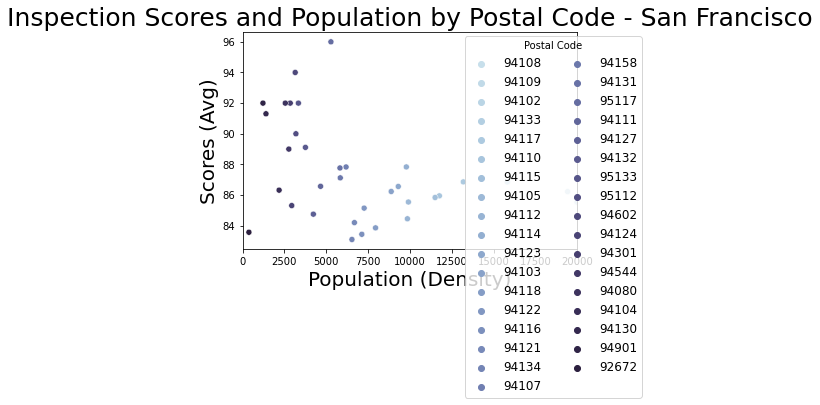

In [81]:
#Average Score for Top 5 Zips based on population density
zipPopScore = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
zipPopScore_df = zipPopScore.groupby(['postal_code', 'density'])['inspection_score'].mean().to_frame()
zipPopScore_df = zipPopScore_df.reset_index()
zipPopScore_df = zipPopScore_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore_df = zipPopScore_df.sort_values(by='density', ascending=False)
zipPopScore_df = zipPopScore_df[zipPopScore_df.density > 0]
zipPopScore_df

#sns.scatterplot(data=top5zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25');

p = sns.scatterplot(data=zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25')
p.set_xlabel("Population (Density)", fontsize = 20)
p.set_ylabel("Scores (Avg)", fontsize = 20)
plt.legend(title="Postal Code", loc='upper right', bbox_to_anchor=(1.21, 1.008), ncol=2, fontsize = 12)
p.set_title('Inspection Scores and Population by Postal Code - San Francisco', fontsize = 25)
plt.xlim(0, 20000);

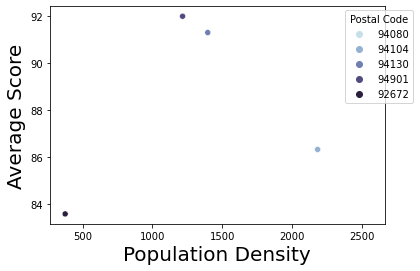

In [82]:
#Average Score for Bottom 5 Zips based on population
zipPopScore = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
zipPopScore_df = zipPopScore.groupby(['postal_code', 'density'])['inspection_score'].mean().to_frame()
zipPopScore_df = zipPopScore_df.reset_index()
zipPopScore_df = zipPopScore_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore_df = zipPopScore_df.sort_values(by='density', ascending=False)
zipPopScore_df = zipPopScore_df[zipPopScore_df.density > 0]
bottom5zipPopScore_df = zipPopScore_df.tail()
bottom5zipPopScore_df
 



p = sns.scatterplot(data=bottom5zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25')
p.set_xlabel("Population Density", fontsize = 20)
p.set_ylabel("Average Score", fontsize = 20)
plt.legend(title="Postal Code", loc='upper right', bbox_to_anchor=(1.10, 1.007));

In [83]:
#Average Inspection Score per Year
avgInspectScorePerYear = sanFranInspectsAndZips.groupby('inspection_year')['inspection_score'].mean().to_frame()
avgInspectScorePerYear = avgInspectScorePerYear.rename(columns={'inspection_year':'year', 'inspection_score' :'score'})
avgInspectScorePerYear = avgInspectScorePerYear.reset_index()
avgInspectScorePerYear

#popPerZip = anchorageInspectsAndZips.groupby('postal_code').city_population.value_counts().to_frame()
#popPerZip = popPerZip = popPerZip.rename(columns={'city_population': 'count'})
#popPerZip = popPerZip.reset_index()
#popPerZip.sort_values(by=['city_population'], ascending=False, inplace=True)
#popPerZip = popPerZip.drop(['count'], axis=1)
#popPerZip = popPerZip.head(17)
#popPerZip



,inspection_year,score
0,2016,86.326264
1,2017,85.596710
2,2018,86.343147
3,2019,85.565336


In [84]:
anchorageInspectsAndZips = pd.read_csv('../data/Rest_Inspections_Anchorage_cleaned.csv')
anchorageInspectsAndZips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16560 entries, 0 to 16559
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   business_id             16560 non-null  object
 1   business_name           16560 non-null  object
 2   city                    16560 non-null  object
 3   state                   16560 non-null  object
 4   postal_code             16560 non-null  int64 
 5   inspection_score        16560 non-null  int64 
 6   inspection_type         16560 non-null  object
 7   violation_description   16560 non-null  object
 8   inspection_month        16560 non-null  int64 
 9   inspection_day          16560 non-null  int64 
 10  inspection_year         16560 non-null  int64 
 11  postal_code_population  16560 non-null  int64 
 12  density                 16560 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.6+ MB


In [85]:
anchorageInspectsAndZips.city.unique()

array(['ANCHORAGE', 'EAGLE RIVER', 'CHUGIAK', 'GIRDWOOD', 'INDIAN',
       'FT RICHARDSON', 'WASILLA', 'PORTAGE'], dtype=object)

In [86]:
oldStringCity = ['EAGLE RIVER', 'CHUGIAK', 'GIRDWOOD', 'INDIAN',
       'FT RICHARDSON', 'WASILLA', 'PORTAGE']
newStringCity = 'ANCHORAGE'
anchorageInspectsAndZips['city'].replace(oldStringCity, newStringCity, inplace=True)

In [87]:
#Average Score: 2016-2019
years = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
avgScorePerMonthSan = years.groupby(['city','inspection_month'])['inspection_score'].mean().to_frame()
avgScorePerMonthSan = avgScorePerMonthSan.rename(columns={'inspection_score' : 'score'})
avgScorePerMonthSan = avgScorePerMonthSan.reset_index()
avgScorePerMonthSan



,city,inspection_month,score
0,SAN FRANCISCO,01,84.927724
1,SAN FRANCISCO,02,86.411392
2,SAN FRANCISCO,03,86.387726
3,SAN FRANCISCO,04,86.088204
4,SAN FRANCISCO,05,86.441075
5,SAN FRANCISCO,06,85.241309
6,SAN FRANCISCO,07,85.150607
7,SAN FRANCISCO,08,84.977265
8,SAN FRANCISCO,09,86.483806
9,SAN FRANCISCO,10,86.098956


In [88]:
years = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin([2016, 2017, 2018, 2019])]
certainZips = years[years['postal_code'].isin([99502,
                                                                                    99504,
                                                                                    99507,
                                                                                    99503,
                                                                                    99516,
                                                                                    99506,
                                                                                    99505,
                                                                                    99577,
                                                                                    99567,
                                                                                    99587,
                                                                                    99518,
                                                                                    99501,
                                                                                    99515,
                                                                                    99508,
                                                                                    99517 ])]

certainZips

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,3,7,2017,15961,926
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,7,13,2017,25215,554
5,FA0010756,AJ'S RIB-A-GO-GO,ANCHORAGE,AK,99507,94,Regular,Demonstration of Knowledge,6,6,2017,36403,297
10,FA0013494,JOJO'S HYPER BEAN LLC,ANCHORAGE,AK,99507,96,Regular,"Food Labeling, Food Protection",11,8,2017,36403,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,7,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,7,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",7,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,7,19,2018,15961,926


In [89]:
avgScorePerMonthAnc = certainZips.groupby(['city','inspection_month'])['inspection_score'].mean().to_frame()
avgScorePerMonthAnc = avgScorePerMonthAnc.rename(columns={'inspection_score' : 'score'})
avgScorePerMonthAnc = avgScorePerMonthAnc.reset_index()
avgScorePerMonthAnc = avgScorePerMonthAnc.sort_values(by='inspection_month', ascending=False)
avgScorePerMonthAnc

,city,inspection_month,score
11,ANCHORAGE,12,91.732892
10,ANCHORAGE,11,92.271242
9,ANCHORAGE,10,91.782931
8,ANCHORAGE,9,92.041190
7,ANCHORAGE,8,91.817391
6,ANCHORAGE,7,92.162420
5,ANCHORAGE,6,90.871383
4,ANCHORAGE,5,92.910811
3,ANCHORAGE,4,92.606957
2,ANCHORAGE,3,92.340027


In [90]:
#avgScorePerMonthAnc = certainZips.groupby(['city','density'])['inspection_score'].mean().to_frame()
#avgScorePerMonthAnc = avgScorePerMonthAnc.rename(columns={'inspection_score' : 'score'})
#avgScorePerMonthAnc = avgScorePerMonthAnc.reset_index()
#avgScorePerMonthAnc = avgScorePerMonthAnc.sort_values(by='inspection_month', ascending=False)
#avgScorePerMonthAnc

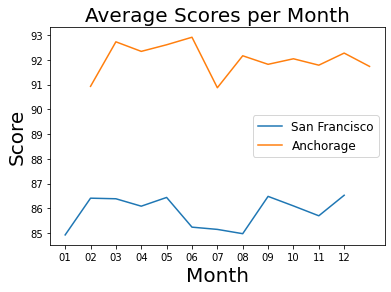

In [91]:
#Line chart
plt.plot(avgScorePerMonthSan.inspection_month, avgScorePerMonthSan.score, avgScorePerMonthAnc.inspection_month, avgScorePerMonthAnc.score)
plt.legend(['San Francisco', 'Anchorage'], fontsize = 12)
plt.title("Average Scores per Month", fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.show();



In [92]:
certainZips

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,3,7,2017,15961,926
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,7,13,2017,25215,554
5,FA0010756,AJ'S RIB-A-GO-GO,ANCHORAGE,AK,99507,94,Regular,Demonstration of Knowledge,6,6,2017,36403,297
10,FA0013494,JOJO'S HYPER BEAN LLC,ANCHORAGE,AK,99507,96,Regular,"Food Labeling, Food Protection",11,8,2017,36403,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,7,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,7,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",7,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,7,19,2018,15961,926


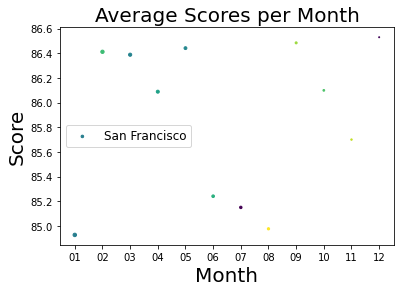

In [93]:
#Line chart
plt.scatter(avgScorePerMonthSan.inspection_month, avgScorePerMonthSan.score, avgScorePerMonthAnc.inspection_month, avgScorePerMonthAnc.score)
plt.legend(['San Francisco', 'Anchorage'], fontsize = 12)
plt.title("Average Scores per Month", fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.show();

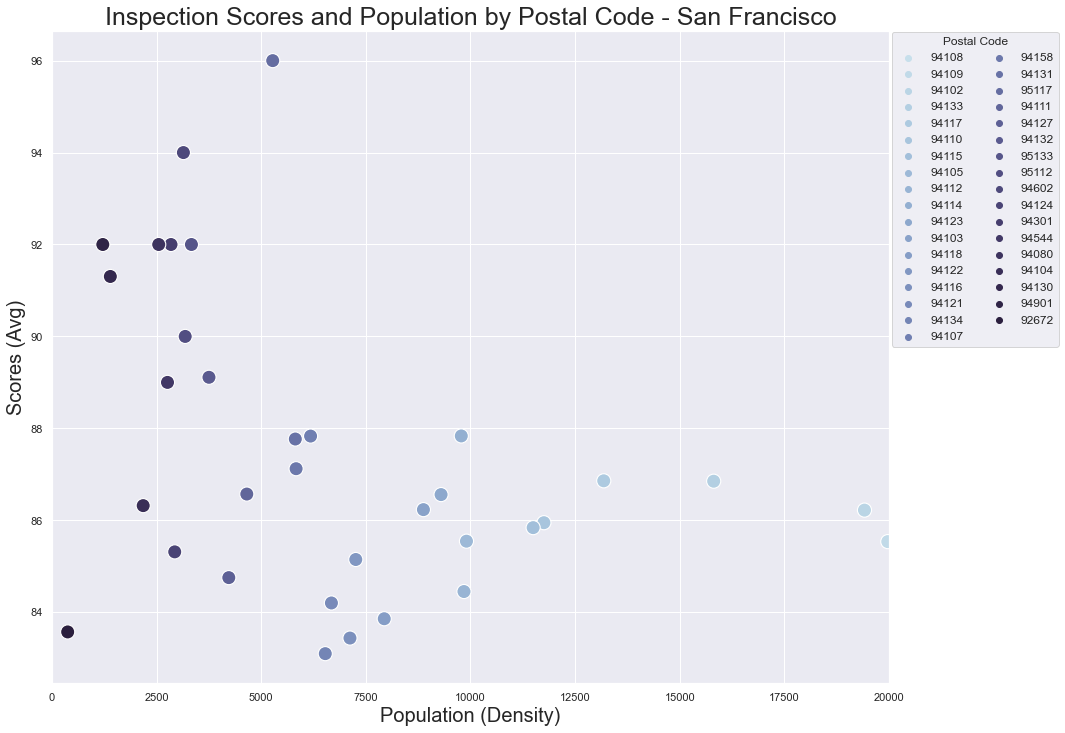

In [139]:
#Average Score for Top 5 Zips based on population density
zipPopScore = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
zipPopScore_df = zipPopScore.groupby(['postal_code', 'density'])['inspection_score'].mean().to_frame()
zipPopScore_df = zipPopScore_df.reset_index()
zipPopScore_df = zipPopScore_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore_df = zipPopScore_df.sort_values(by='density', ascending=False)
zipPopScore_df = zipPopScore_df[zipPopScore_df.density > 0]
zipPopScore_df

#sns.scatterplot(data=top5zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25');

p = sns.scatterplot(data=zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25', s=200)
p.set_xlabel("Population (Density)", fontsize = 20)
p.set_ylabel("Scores (Avg)", fontsize = 20)
plt.legend(title="Postal Code", loc='upper right', bbox_to_anchor=(1.21, 1.008), ncol=2, fontsize = 12)
p.set_title('Inspection Scores and Population by Postal Code - San Francisco', fontsize = 25)
plt.xlim(0, 20000);


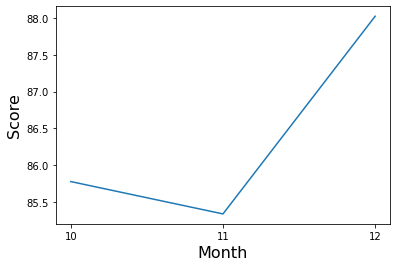

In [95]:
#2016 Only
year2016 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016'])]
avgScorePerMonth2016 = year2016.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2016 = avgScorePerMonth2016.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2016 = avgScorePerMonth2016.reset_index()

#Line chart
plt.plot(avgScorePerMonth2016.inspection_month, avgScorePerMonth2016.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()


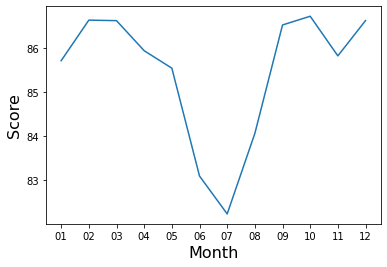

In [96]:
#2017 Only
year2017 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2017'])]
avgScorePerMonth2017 = year2017.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2017 = avgScorePerMonth2017.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2017 = avgScorePerMonth2017.reset_index()
avgScorePerMonth2017 

#Line Chart
plt.plot(avgScorePerMonth2017.inspection_month, avgScorePerMonth2017.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

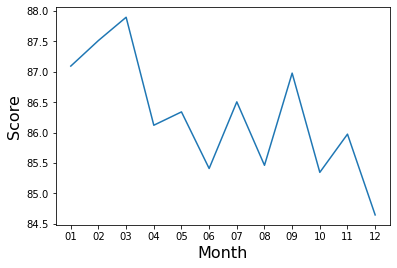

In [97]:
#2018 Only
year2018 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2018'])]
avgScorePerMonth2018 = year2018.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2018 = avgScorePerMonth2018.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2018 = avgScorePerMonth2018.reset_index()
#avgScorePerMonth2018

#Line Chart
plt.plot(avgScorePerMonth2018.inspection_month, avgScorePerMonth2018.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

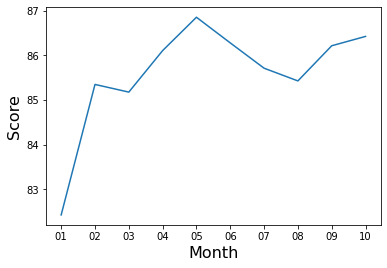

In [98]:
#2019 Only
year2019 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2019'])]
avgScorePerMonth2019 = year2019.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2019 = avgScorePerMonth2019.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2019 = avgScorePerMonth2019.reset_index()
#avgScorePerMonth2019

#Line Chart
plt.plot(avgScorePerMonth2019.inspection_month, avgScorePerMonth2019.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

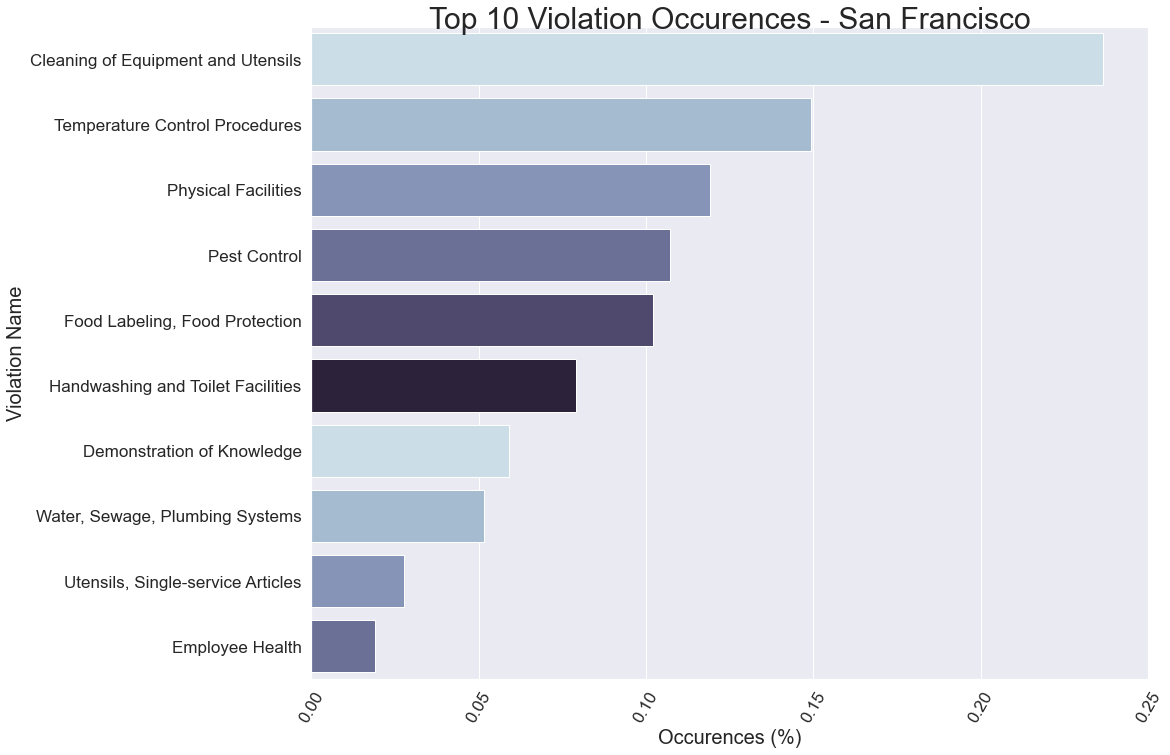

In [99]:
violDescrCount = sanFranInspectsAndZips['violation_description'].value_counts(normalize=True)
top10violDescrCount = violDescrCount.head(10)
top10violDescrCount = top10violDescrCount.reset_index()
top10violDescrCount = top10violDescrCount.rename(columns={'index' : 'violation_description', 'violation_description' : 'count'})
top10violDescrCount

sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='count', y='violation_description', data=top10violDescrCount, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Occurences (%)', fontdict= {'fontsize':20})
plt.ylabel('Violation Name', fontdict= {'fontsize':20})
plt.title("Top 10 Violation Occurences - San Francisco",fontdict= { 'fontsize': 30,'verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17)
plt.xlim(.0, .25);

''

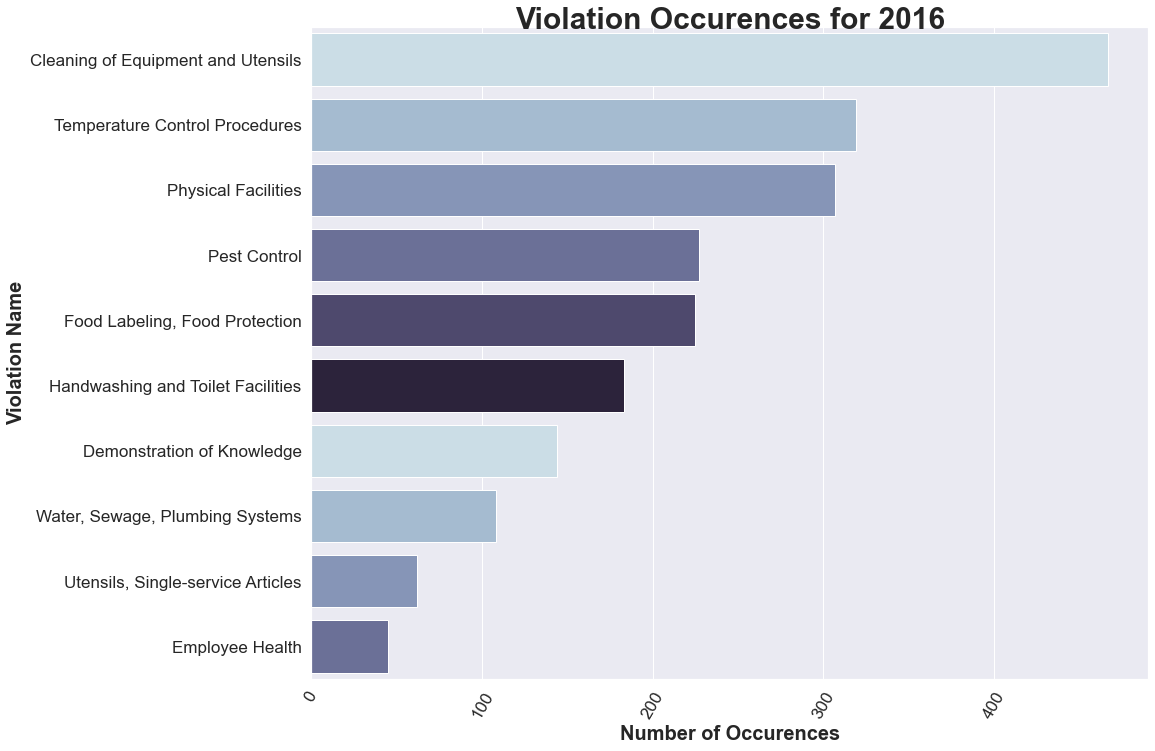

In [100]:
#Violation Descriptions for 2016
year2016 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016'])]
violDescr2016 = year2016['violation_description'].value_counts().to_frame()
violDescr2016 = violDescr2016.reset_index()
violDescr2016 = violDescr2016.rename(columns={'index' : 'violation_description', 'violation_description' : 'count'})
top10violDescrCount = violDescr2016.head(10)
top10violDescrCount

sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='count', y='violation_description', data=top10violDescrCount, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Violation Occurences for 2016",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17)
;

''

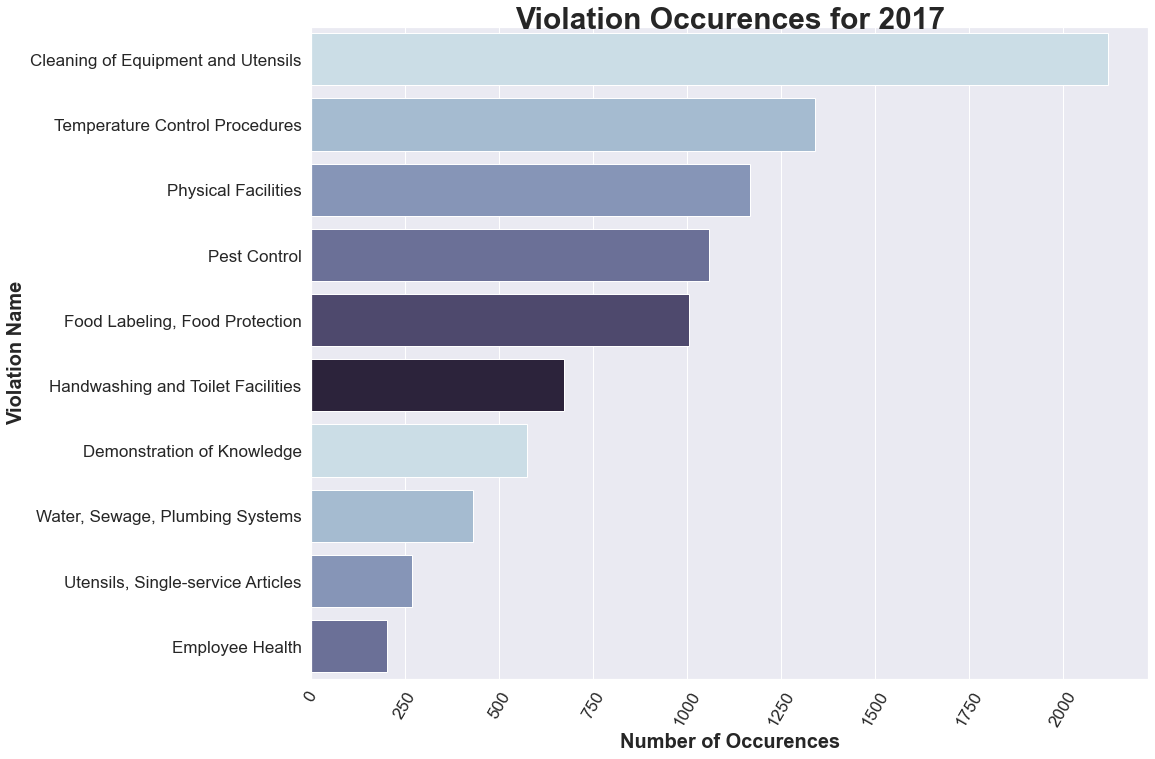

In [101]:
#Violation Descriptions for 2017
year2017 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2017'])]
violDescr2017 = year2017['violation_description'].value_counts().to_frame()
violDescr2017 = violDescr2017.reset_index()
violDescr2017 = violDescr2017.rename(columns={'index' : 'violation_description', 'violation_description' : 'count'})
top10violDescrCount = violDescr2017.head(10)
top10violDescrCount

sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='count', y='violation_description', data=top10violDescrCount, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Violation Occurences for 2017",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17)
;

''

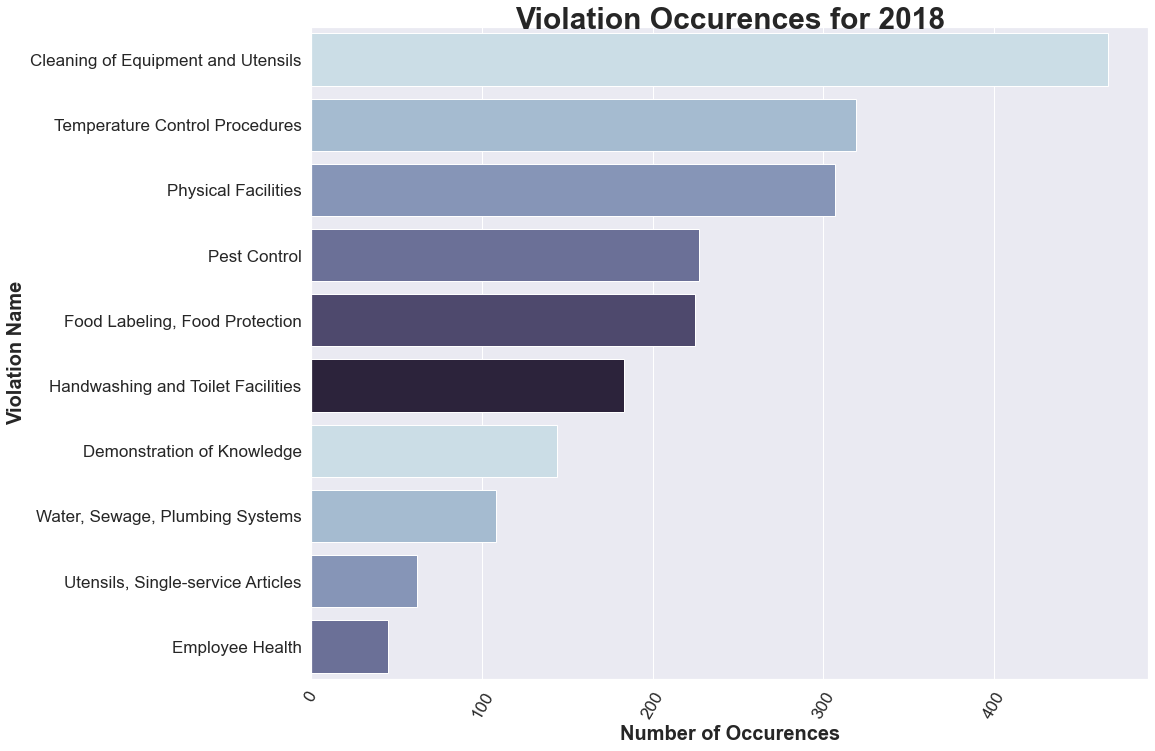

In [102]:
#Violation Descriptions for 2018
year2018 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2018'])]
violDescr2018 = year2018['violation_description'].value_counts().to_frame()
violDescr2018 = violDescr2016.reset_index()
violDescr2018 = violDescr2016.rename(columns={'index' : 'violation_description', 'violation_description' : 'count'})
top10violDescrCount = violDescr2016.head(10)
top10violDescrCount

sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='count', y='violation_description', data=top10violDescrCount, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Violation Occurences for 2018",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17)
;

''

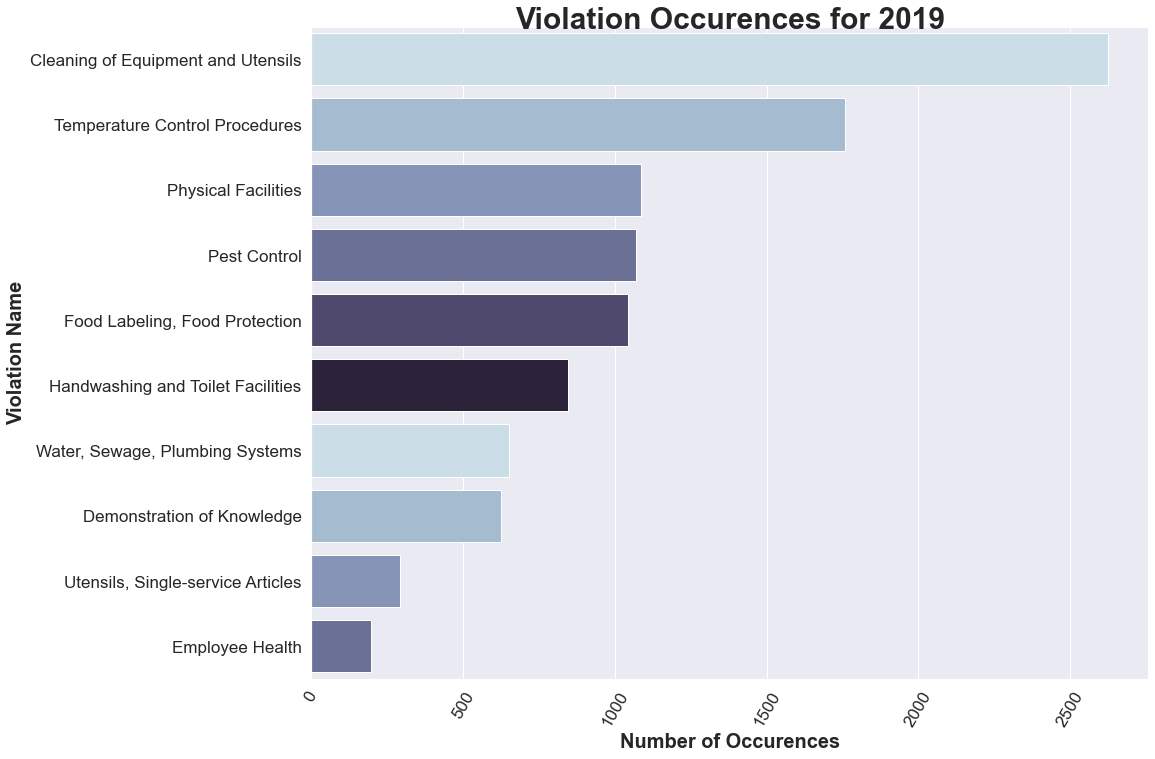

In [103]:
#Violation Descriptions for 2019
year2019 = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2019'])]
violDescr2019 = year2019['violation_description'].value_counts().to_frame()
violDescr2019 = violDescr2019.reset_index()
violDescr2019 = violDescr2019.rename(columns={'index' : 'violation_description', 'violation_description' : 'count'})
top10violDescrCount = violDescr2019.head(10)
top10violDescrCount

sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='count', y='violation_description', data=top10violDescrCount, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Violation Occurences for 2019",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17)
;

In [104]:
#Frequency of Inspections
inspectionTypeFrequency = sanFranInspectsAndZips['inspection_type'].value_counts()
inspectionTypeFrequency

Regular    31622
Name: inspection_type, dtype: int64

In [105]:
sanFranInspectsAndZips['inspection_type'].unique()

array(['Regular'], dtype=object)

In [106]:
#Subsetting by years
yearsForDistribution = sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
yearsForDistribution 

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,SAN FRANCISCO,CA,94133,88,Regular,"Food Labeling, Food Protection",09,17,2018,26930,15812
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87,Regular,Pest Control,04,15,2019,13535,20257
2,1203,TAWAN'S THAI FOOD,SAN FRANCISCO,CA,94118,77,Regular,Temperature Control Procedures,08,03,2017,41241,7940
3,1345,Cordon Bleu,SAN FRANCISCO,CA,94109,81,Regular,Temperature Control Procedures,09,28,2017,55797,19972
4,1352,LA TORTILLA,SAN FRANCISCO,CA,94114,74,Regular,Pest Control,06,20,2018,35077,9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84,Regular,Pest Control,03,27,2019,43526,13185
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91,Regular,Temperature Control Procedures,06,18,2019,43843,6678
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264,19415
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92,Regular,Handwashing and Toilet Facilities,06,10,2019,31585,8876


In [107]:
yearsForDistribution.shape

(31622, 13)

In [108]:
yearsForDistribution.violation_description.nunique()

19

C:\Users\jrtho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


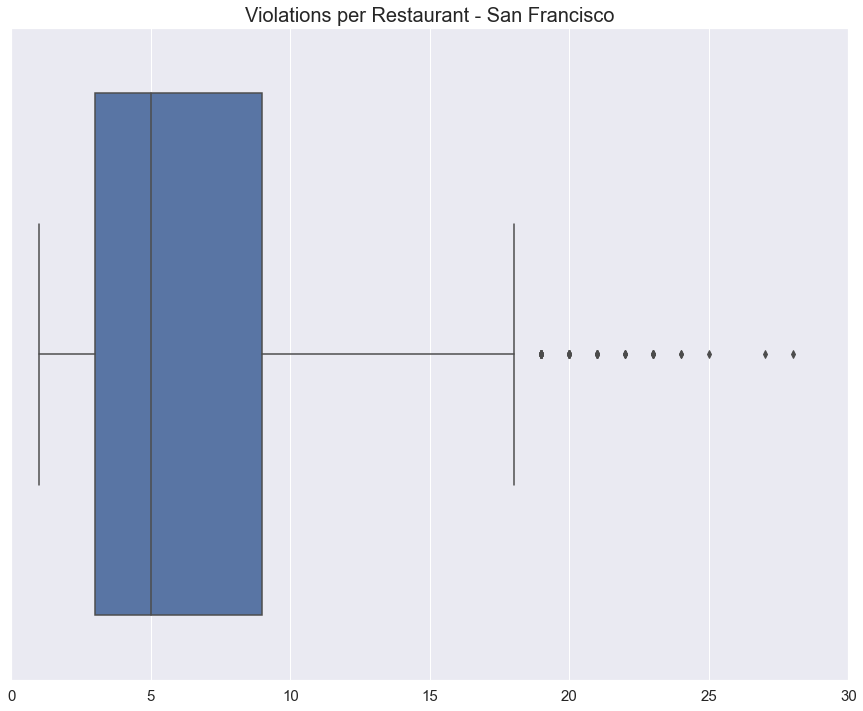

In [109]:
#Violation Counts and Distribution
violationCountsByRest = yearsForDistribution.groupby('business_id')['violation_description'].count().to_frame()
violationCountsByRest
sns.boxplot(violationCountsByRest.violation_description)
plt.title('Violations per Restaurant - San Francisco', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=15)
plt.xlim(0, 30);

In [110]:
#Violation Counts and Distribution
#Population Density by Zip
popDensityByZip_df = yearsForDistribution.groupby('postal_code')['density'].value_counts().to_frame()
popDensityByZip_df = popDensityByZip_df.rename(columns={'density': 'count'})
popDensityByZip_df = popDensityByZip_df.reset_index() 
popDensityByZip_df.sort_values(by=['density'], ascending=False, inplace=True)
popDensityByZip_df = popDensityByZip_df.drop(['count'], axis=1)
popDensityByZip_df  = popDensityByZip_df [popDensityByZip_df.density > 0]

popDensityByZip_df 


,postal_code,density
13,94108,20257
14,94109,19972
7,94102,19415
36,94133,15812
22,94117,13185
15,94110,11755
20,94115,11498
11,94105,9905
18,94112,9845
19,94114,9781


''

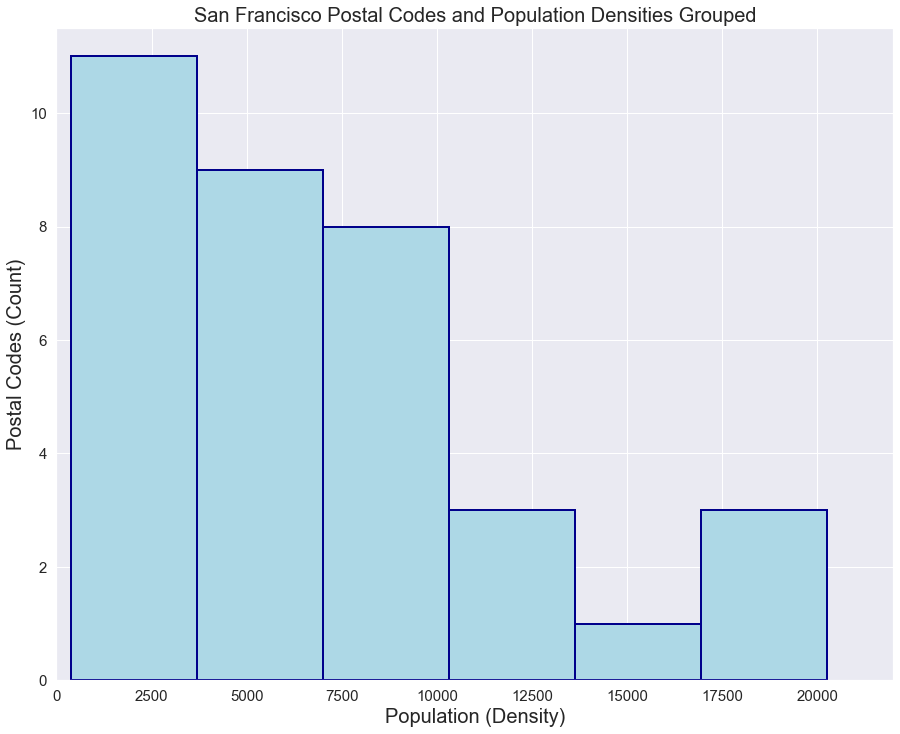

In [111]:
plt.hist(popDensityByZip_df.density, bins=6, color='lightblue', ec='darkblue', lw='2')
#sns.histplot(data=popDensityByZip_df, bins=6, palette='ch:s=.25,rot=-.25', legend=False)
plt.title('San Francisco Postal Codes and Population Densities Grouped', fontsize=20)
plt.xlabel('Population (Density)', fontsize=20)
plt.ylabel('Postal Codes (Count)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 11.5)
plt.xlim(0, 22000)
;

In [112]:
#Median of violations per restaurant - 1 of 6
popDensity1 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['95133',
                                                                                    '95112',
                                                                                    '94602',
                                                                                    '94124',
                                                                                    '94301',
                                                                                    '94544',
                                                                                    '94080',
                                                                                    '94104',
                                                                                    '94130',
                                                                                    '94901',
                                                                                    '92672'])]

violationCountsByRest1 = popDensity1.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian1 = violationCountsByRest1['violation_description'].median()
restViolationsMedian1

5.0

In [113]:
#Median of violations per restaurant - 2 of 6
popDensity2 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['94121',
                                                                                    '94134',
                                                                                    '94107',
                                                                                    '94158',
                                                                                    '94131',
                                                                                    '95117',
                                                                                    '94111',
                                                                                    '94127',
                                                                                    '94132'])]

violationCountsByRest2 = popDensity2.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian2 = violationCountsByRest2['violation_description'].median()
restViolationsMedian2

5.0

In [114]:
#Median of violations per restaurant - 3 of 6
popDensity3 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['94105',
                                                                                    '94112',
                                                                                    '94114',
                                                                                    '94123',
                                                                                    '94103',
                                                                                    '94118',
                                                                                    '94122',
                                                                                    '94116'])]

violationCountsByRest3 = popDensity3.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian3 = violationCountsByRest3['violation_description'].median()
restViolationsMedian3

6.0

In [115]:
#Median of violations per restaurant - 4 of 6
popDensity4 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['94117',
                                                                             '94110',
                                                                             '94115'])]

violationCountsByRest4 = popDensity4.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian4 = violationCountsByRest4['violation_description'].median()
restViolationsMedian4

6.0

In [116]:
#Median of violations per restaurant - 5 of 6
popDensity5 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['94133'])]

violationCountsByRest5 = popDensity5.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian5 = violationCountsByRest5['violation_description'].median()
restViolationsMedian5

5.0

In [117]:
#Median of violations per restaurant - 6 of 6
popDensity6 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['94108', '94109', '94102'])]

violationCountsByRest6 = popDensity6.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian6 = violationCountsByRest6['violation_description'].median()
restViolationsMedian6

5.0

In [118]:
medians = {'density_zip_buckets' : ['First: 11/3750', 
                       'Second: 9/6875',
                       'Third: 8/10313',
                       'Fourth: 3/12656',
                       'Fifth: 1/16,875',
                       'Sixth: 3/20313'],
           'medians' : [restViolationsMedian1, 
                       restViolationsMedian2,
                       restViolationsMedian3,
                       restViolationsMedian4,
                       restViolationsMedian5,
                       restViolationsMedian6]}
medians_pd = pd.DataFrame(medians)
medians_pd

,density_zip_buckets,medians
0,First: 11/3750,5.0
1,Second: 9/6875,5.0
2,Third: 8/10313,6.0
3,Fourth: 3/12656,6.0
4,"Fifth: 1/16,875",5.0
5,Sixth: 3/20313,5.0


''

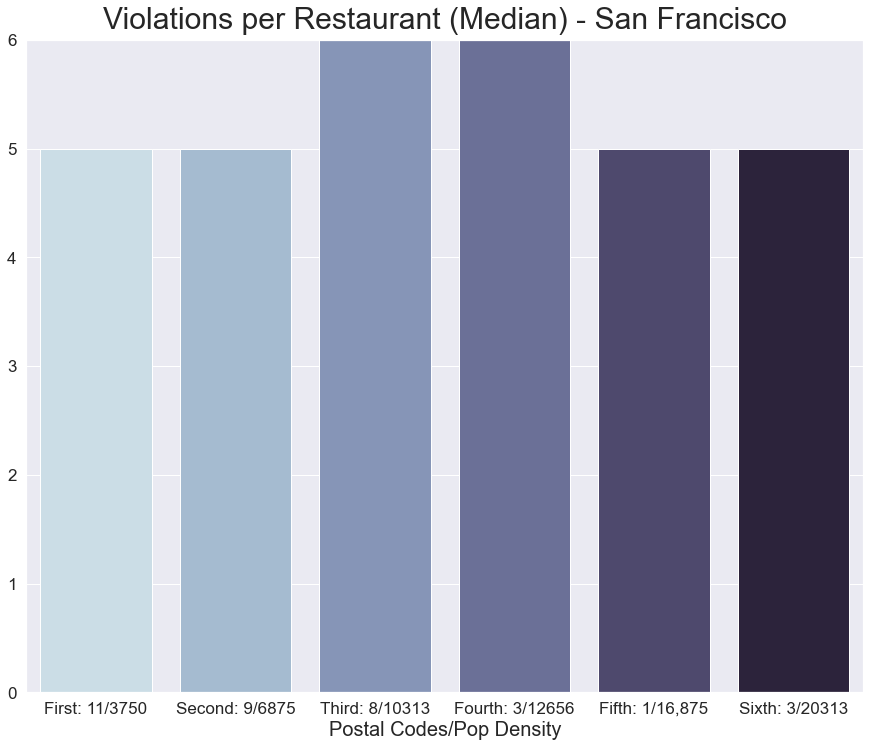

In [119]:
sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='density_zip_buckets', y='medians', data=medians_pd, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Postal Codes/Pop Density', fontdict= {'fontsize':20})
plt.ylabel(None)
plt.title("Violations per Restaurant (Median) - San Francisco",fontdict= { 'fontsize': 30, 'verticalalignment': 'center'}, y=1.02)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.ylim(0, 6)
;

In [120]:
between80And89_df = pd.DataFrame(sanFranInspectsAndZips[sanFranInspectsAndZips['inspection_score'].between(80, 89)].value_counts())

In [121]:
#Population Density by Zip
popDensityByZip_df = sanFranInspectsAndZips.groupby('postal_code')['density'].value_counts().to_frame()
popDensityByZip_df = popDensityByZip_df.rename(columns={'density': 'count'})
popDensityByZip_df = popDensityByZip_df.reset_index() 
popDensityByZip_df.sort_values(by=['density'], ascending=False, inplace=True)
popDensityByZip_df = popDensityByZip_df.drop(['count'], axis=1)
popDensityByZip_df  = popDensityByZip_df [popDensityByZip_df.density > 0]
popDensityByZip_df

,postal_code,density
13,94108,20257
14,94109,19972
7,94102,19415
36,94133,15812
22,94117,13185
15,94110,11755
20,94115,11498
11,94105,9905
18,94112,9845
19,94114,9781


In [122]:
years = sanFranInspectsAndZips['inspection_year'].unique()
years

array(['2018', '2019', '2017', '2016'], dtype=object)

In [123]:
zips = yearsForDistribution['postal_code'].unique()
zips 

array(['94133', '94108', '94118', '94109', '94114', '94105', '94102',
       '94110', '94127', '94115', '94122', '94111', '94103', '94123',
       '94132', '94117', '94107', '94116', '94131', '94112', '94121',
       '94124', '94104', '94158', '94134', '94013', '92672', '94130',
       '941', '95105', '94101', '94120', '64110', '94544', '94080',
       '94188', '00000', '94143', '94602', '95112', '94301', '94901',
       '95117', '95133'], dtype=object)

In [124]:
zips35Only = yearsForDistribution[yearsForDistribution['postal_code'].isin(['95133','95112','94602',
                                                    '94124','94301','94544',
                                                    '94080','94104','94130',
                                                    '94901','92672','94121',
                                                    '94134','94107','94158',
                                                    '94131','95117','94111',
                                                    '94127','94132','94105',
                                                    '94112','94114','94123',
                                                    '94103','94118','94122',
                                                    '94116','94117','94110',
                                                    '94115','94133','94108',
                                                    '94109','94102'])]
zips35Only

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
0,835,Kam Po Kitchen,SAN FRANCISCO,CA,94133,88,Regular,"Food Labeling, Food Protection",09,17,2018,26930,15812
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87,Regular,Pest Control,04,15,2019,13535,20257
2,1203,TAWAN'S THAI FOOD,SAN FRANCISCO,CA,94118,77,Regular,Temperature Control Procedures,08,03,2017,41241,7940
3,1345,Cordon Bleu,SAN FRANCISCO,CA,94109,81,Regular,Temperature Control Procedures,09,28,2017,55797,19972
4,1352,LA TORTILLA,SAN FRANCISCO,CA,94114,74,Regular,Pest Control,06,20,2018,35077,9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84,Regular,Pest Control,03,27,2019,43526,13185
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91,Regular,Temperature Control Procedures,06,18,2019,43843,6678
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264,19415
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92,Regular,Handwashing and Toilet Facilities,06,10,2019,31585,8876


In [125]:
year2019 = zips35Only[zips35Only['inspection_year'].isin(['2019'])]
year2019

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
1,905,Working Girls' Cafe',SAN FRANCISCO,CA,94108,87,Regular,Pest Control,04,15,2019,13535,20257
5,1652,STARBUCKS,SAN FRANCISCO,CA,94105,96,Regular,Pest Control,06,11,2019,12944,9905
6,3019,Tad's,SAN FRANCISCO,CA,94102,88,Regular,"Food Labeling, Food Protection",07,02,2019,33264,19415
7,3286,Super Burrito,SAN FRANCISCO,CA,94109,81,Regular,Temperature Control Procedures,02,14,2019,55797,19972
10,34411,Gabby's Market & Deli,SAN FRANCISCO,CA,94105,98,Regular,"Food Labeling, Food Protection",09,13,2019,12944,9905
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,95754,Fools Errand,SAN FRANCISCO,CA,94117,84,Regular,Pest Control,03,27,2019,43526,13185
31632,100219,NAYA CAFE,SAN FRANCISCO,CA,94121,91,Regular,Temperature Control Procedures,06,18,2019,43843,6678
31633,96532,THE CLIFT ROYAL SONESTA HOTEL,SAN FRANCISCO,CA,94102,92,Regular,Cleaning of Equipment and Utensils,04,11,2019,33264,19415
31634,97503,Moscone South Main Kitchen,SAN FRANCISCO,CA,94103,92,Regular,Handwashing and Toilet Facilities,06,10,2019,31585,8876


In [126]:
zip2019 = year2019['postal_code'].unique()
zip2019

array(['94108', '94105', '94102', '94109', '94118', '94114', '94115',
       '94111', '94110', '94103', '94133', '94132', '94112', '94121',
       '94124', '94104', '94117', '94107', '94122', '94123', '94127',
       '94134', '94131', '94116', '92672', '94158', '94544', '94130',
       '95112', '94301', '94901', '95117'], dtype=object)

In [127]:
popByZip = year2019['city_population'].unique()
popByZip

array([13535, 12944, 33264, 55797, 41241, 35077, 33841,  4023, 72765,
       31585, 26930, 30437, 85053, 43843, 36278,   438, 43526, 29708,
       61248, 26074, 20413, 43286, 30458, 46594,     0, 34659,  9231,
       78333,  3184, 59959, 17470, 41235, 31702])

In [128]:
popByZipSum = popByZip.sum()
popByZipSum

1134131

In [129]:
year2018 = zips35Only[zips35Only['inspection_year'].isin(['2018'])]
yearZip2018 = year2018[year2018['postal_code'].isin(['95133', '94602', '94080'])]
yearZip2018

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,city_population,density
16416,90733,Jeepsilog,SAN FRANCISCO,CA,94080,90,Regular,Cleaning of Equipment and Utensils,12,07,2018,67263,2551
18349,85459,Orbit Room,SAN FRANCISCO,CA,94602,94,Regular,Physical Facilities,12,06,2018,29593,3141
19213,90733,Jeepsilog,SAN FRANCISCO,CA,94080,90,Regular,Temperature Control Procedures,12,07,2018,67263,2551
19249,85459,Orbit Room,SAN FRANCISCO,CA,94602,94,Regular,Demonstration of Knowledge,12,06,2018,29593,3141
23739,85459,Orbit Room,SAN FRANCISCO,CA,94602,94,Regular,Cleaning of Equipment and Utensils,12,06,2018,29593,3141
29627,90733,Jeepsilog,SAN FRANCISCO,CA,94080,96,Regular,Cleaning of Equipment and Utensils,08,11,2018,67263,2551
31255,95684,Canopy,SAN FRANCISCO,CA,95133,92,Regular,Temperature Control Procedures,07,20,2018,28158,3333
31468,95684,Canopy,SAN FRANCISCO,CA,95133,92,Regular,Handwashing and Toilet Facilities,07,20,2018,28158,3333


In [130]:
popByZip2018 = yearZip2018['city_population'].unique()
popByZip2018
#popByZip = year2019['city_population'].unique()
#popByZip

array([67263, 29593, 28158])

In [131]:
zip2018 = year2018['postal_code'].unique()
zip2018

array(['94133', '94114', '94110', '94105', '94122', '94102', '94115',
       '94103', '94109', '94117', '94116', '94107', '94131', '94112',
       '94121', '94124', '94132', '94118', '94108', '94104', '94111',
       '94134', '94123', '94127', '94158', '94130', '94080', '94602',
       '94901', '95133'], dtype=object)

In [132]:
numOfRest = zips35Only['business_id'].nunique()
numOfRest

5118

In [133]:
totNumOfInsp = zips35Only['business_id'].count()
totNumOfInsp

31568

In [134]:
numInspectYear = totNumOfInsp / 4
numInspectYear

7892.0

In [135]:
avgInspecPerRest = numInspectYear / numOfRest
avgInspecPerRest

1.5420085971082453